# <center>**CUSTOMER TRANSACTION PREDICTION**</center> 

## **PROJECT TEAM ID**: PTID-CDS-FEB-25-2411
## **PROJECT ID**: PRCP-1003-CustTransPred

## **PROBLEM STATEMENT**

### *Based on the dataset with the list of features, we need to create a predictive model which finds which type of customers will make future transactions with the bank.*

### **1) IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### **2) LOADING THE DATA**

In [2]:
#Reading the dataset and storing it in the variable data
data = pd.read_csv("PRCP-1003-CustTransPred.csv") 
pd.set_option("display.max_columns", None) #setting the option to show maximum columns in the dataset

### **3) BASIC CHECKS**

In [3]:
data.head() #checking the first five rows of the dataset

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [4]:
data.tail() #checking the last five rows

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [5]:
data.sample(10) #checking random rows in the dataset

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
155245,train_155245,0,10.0068,3.2267,13.2266,8.4694,10.1969,-14.4137,4.9107,20.7892,3.8817,7.2591,3.6919,7.2598,14.1465,6.2031,9.2518,14.1721,7.1724,-9.9189,33.3836,6.7622,1.7769,10.4305,1.0866,3.3280,1.9119,13.9588,7.0742,-2.3923,5.7392,7.2692,-12.4774,5.8726,-2.3190,13.8833,11.4158,2.3168,1.2263,4.6950,5.0994,6.0422,-17.9132,10.8300,12.1186,11.7487,14.8862,-1.0494,14.8271,1.2835,26.0518,18.4018,12.5948,9.1970,-2.1548,6.5106,9.3470,19.5757,15.1207,6.2422,3.7072,8.3121,5.7247,-19.9224,6.0746,3.7717,6.3772,0.0577,5.3284,14.7748,5.0185,-10.4091,27.3187,0.4178,-3.0821,9.8975,15.3382,19.4894,4.3712,15.0259,5.4204,16.2263,-4.8448,14.2836,-22.5768,3.1426,2.7470,16.6806,5.0313,5.1367,11.1133,2.3055,3.7409,6.9668,10.8060,9.6375,8.8673,-0.3089,6.4094,13.0972,1.6680,1.2724,-12.8036,7.5908,31.9031,1.7805,12.6712,4.3883,10.4925,29.0725,14.4172,16.3290,5.9144,6.0280,2.2776,13.4661,4.1574,0.4572,1.9844,11.8943,6.8579,3.8890,18.1022,9.9466,-1.9772,13.8685,3.2381,12.8409,14.2227,5.5868,1.8081,17.3854,13.2943,1.0860,6.5313,6.9801,-7.7371,6.0997,9.9160,25.1684,-4.3215,2.6704,8.1969,16.7421,15.6507,12.0684,9.7535,0.0131,12.1538,13.6580,3.9754,7.0644,12.1331,8.5986,8.9287,14.0974,2.4360,4.9289,12.8232,1.7310,12.7425,14.4603,20.2369,5.7313,7.7840,14.9461,0.0349,17.7953,2.4257,-3.3667,10.3639,5.1787,3.2763,-8.3178,15.0894,-2.9656,11.7955,13.6949,12.5301,9.4123,-4.1741,3.7309,-2.1849,11.8340,-3.9630,8.4530,7.8984,-4.9347,9.4879,-30.9427,14.7305,0.7079,6.8708,5.1594,1.5355,12.3918,19.6890,-0.2796,-2.7967,8.3720,20.1256,11.6073
187547,train_187547,0,8.9159,-3.3816,8.2034,8.3823,8.9788,-15.7530,3.5449,18.0130,2.8711,5.7944,3.1924,-0.4226,13.9647,8.7334,10.3438,15.1831,11.6525,-10.4641,9.5801,13.6720,17.1273,35.5957,4.6683,2.3413,11.3258,13.3295,-2.4179,-3.3684,3.6051,2.6626,5.5592,11.5369,-1.0645,15.5552,10.3161,6.8935,0.9102,6.8844,12.3305,0.4711,-15.3987,13.3326,10.4153,11.9546,16.0700,-25.9510,12.8645,5.3405,-1.8014,9.8110,11.6826,17.9756,2.4169,5.1158,-3.8506,19.3688,22.5036,7.2948,4.8138,9.5019,17.6881,-12.3990,-2.0475,-1.3651,9.3583,-3.8016,5.4415,12.9711,5.0151,-5.7104,7.6256,0.8556,-1.0296,13.2600,13.6334,18.7148,13.3776,13.5690,6.0111,14.3848,-1.6932,15.4955,-15.6794,-7.4280,1.8100,10.8005,-1.4440,9.8908,7.6472,-0.1077,1.6594,6.9086,13.7165,10.2581,8.9937,-0.6533,16.1610,4.3506,2.2170,-0.9564,-23.8254,9.4565,23.0299,1.5096,12.8623,3.9587,10.7420,18.0633,14.0910,23.1623,1.9093,7.4996,3.9645,8.4973,5.0026,2.7810,5.6853,29.0956,-9.1216,8.7710,34.6095,13.9995,11.1873,13.

In [6]:
data.shape #checking the number of rows and columns in the dataset

(200000, 202)

* This data set have 202 columns including the target column and 200000 rows

In [7]:
#checking the dimension of the dataset
print(f"The dimension of the dataset is {data.ndim}")

The dimension of the dataset is 2


In [8]:
data.index #checking the properties of the row index

RangeIndex(start=0, stop=200000, step=1)

* The dataset have 200000 rows and each row is increased by one

In [9]:
data.keys() #checking the properties of columns in the dataset

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

* The dataset have 202 rows including the ID_code and targer column
* It has a list of features named as var_0 to var_199

In [10]:
data.info() #checking the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


* As per the above information, we have all the datatypes in the dataset

In [11]:
data.describe() #checking the statistical description of the dataset

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

### **4) EXPLORATORY DATA ANALYSIS**

In [12]:
#Checking the counts of the targer column

data['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

* Targer value is binary classified value
* We have 179902 samples who do not make future transaction
* We have 20098 samples who make future transactions

In [13]:
#sns.countplot(data['target'])
#plt.show()

#### **CHECKING THE DISTRIBUTION OF THE COLUMNS**

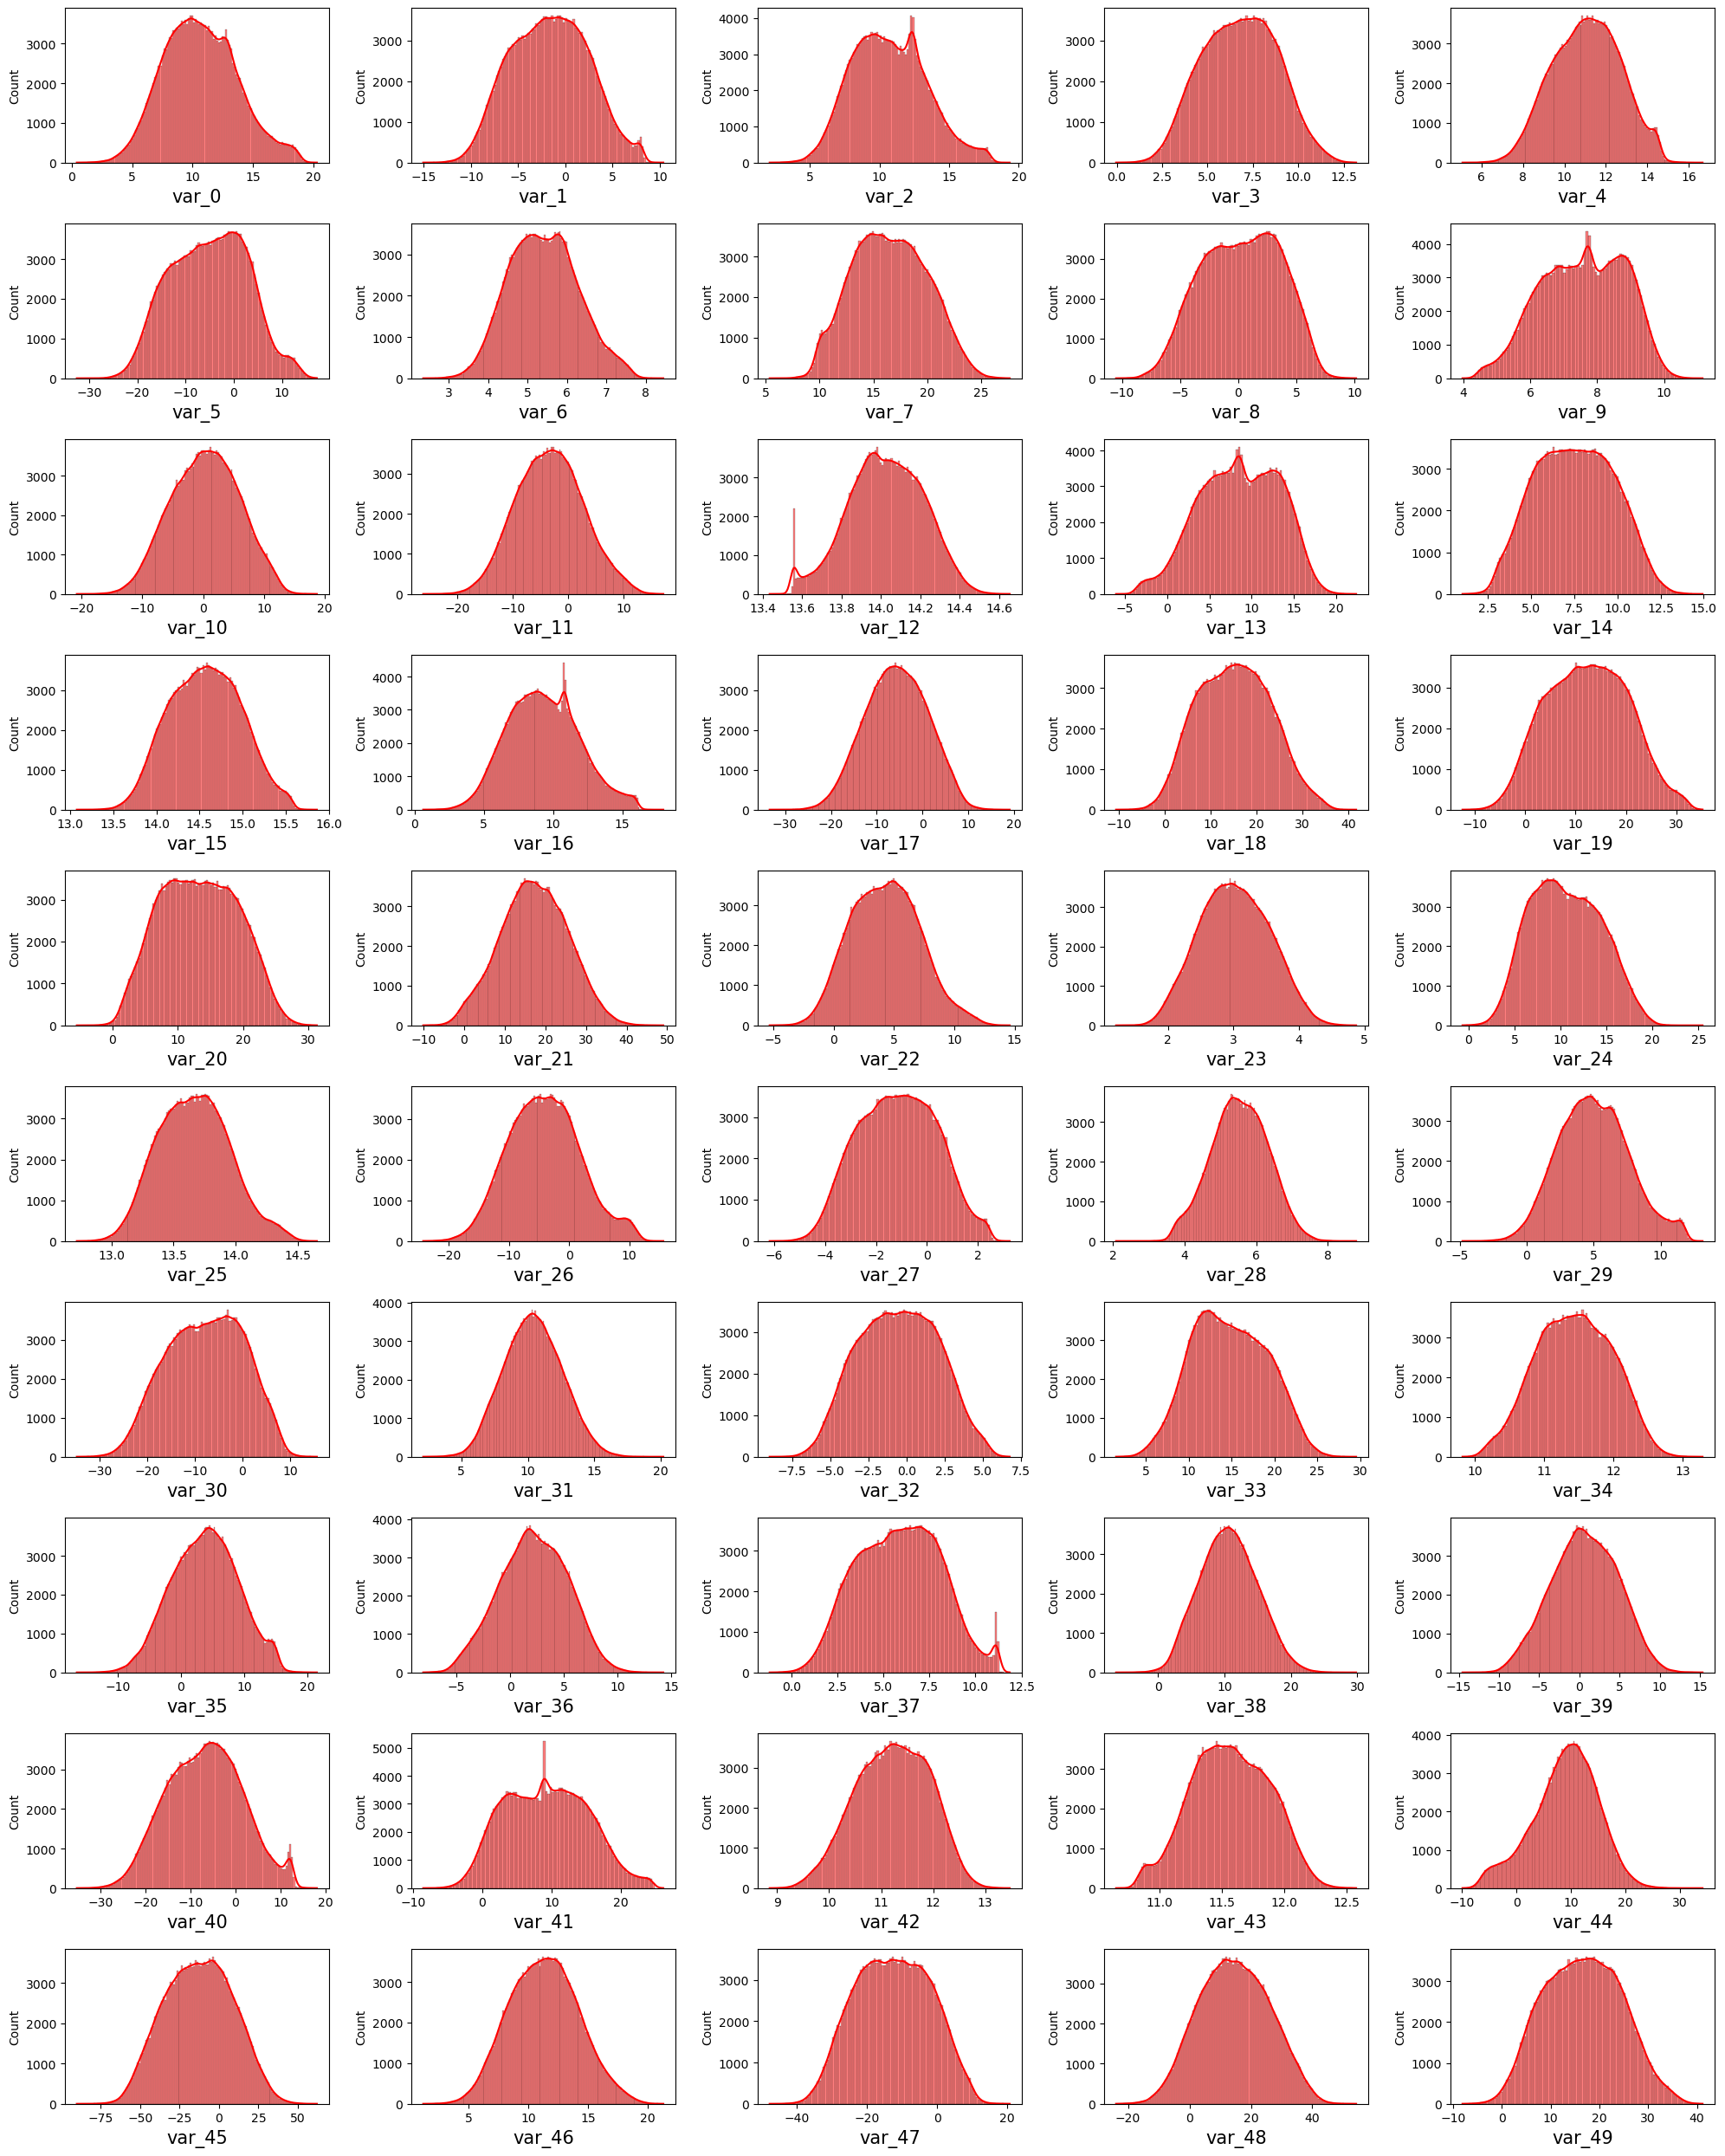

In [14]:
#Checking the distribution of the next 50 columns (var_1 to var_50)

dist1 = data.iloc[:,2:53]
plt.figure(figsize=(20,25))
plotno=1
for i in dist1:
    if plotno<=50:
        plt.subplot(10,5,plotno)
        sns.histplot(dist1[i],kde=True,color='red')
        plt.xlabel(i, fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

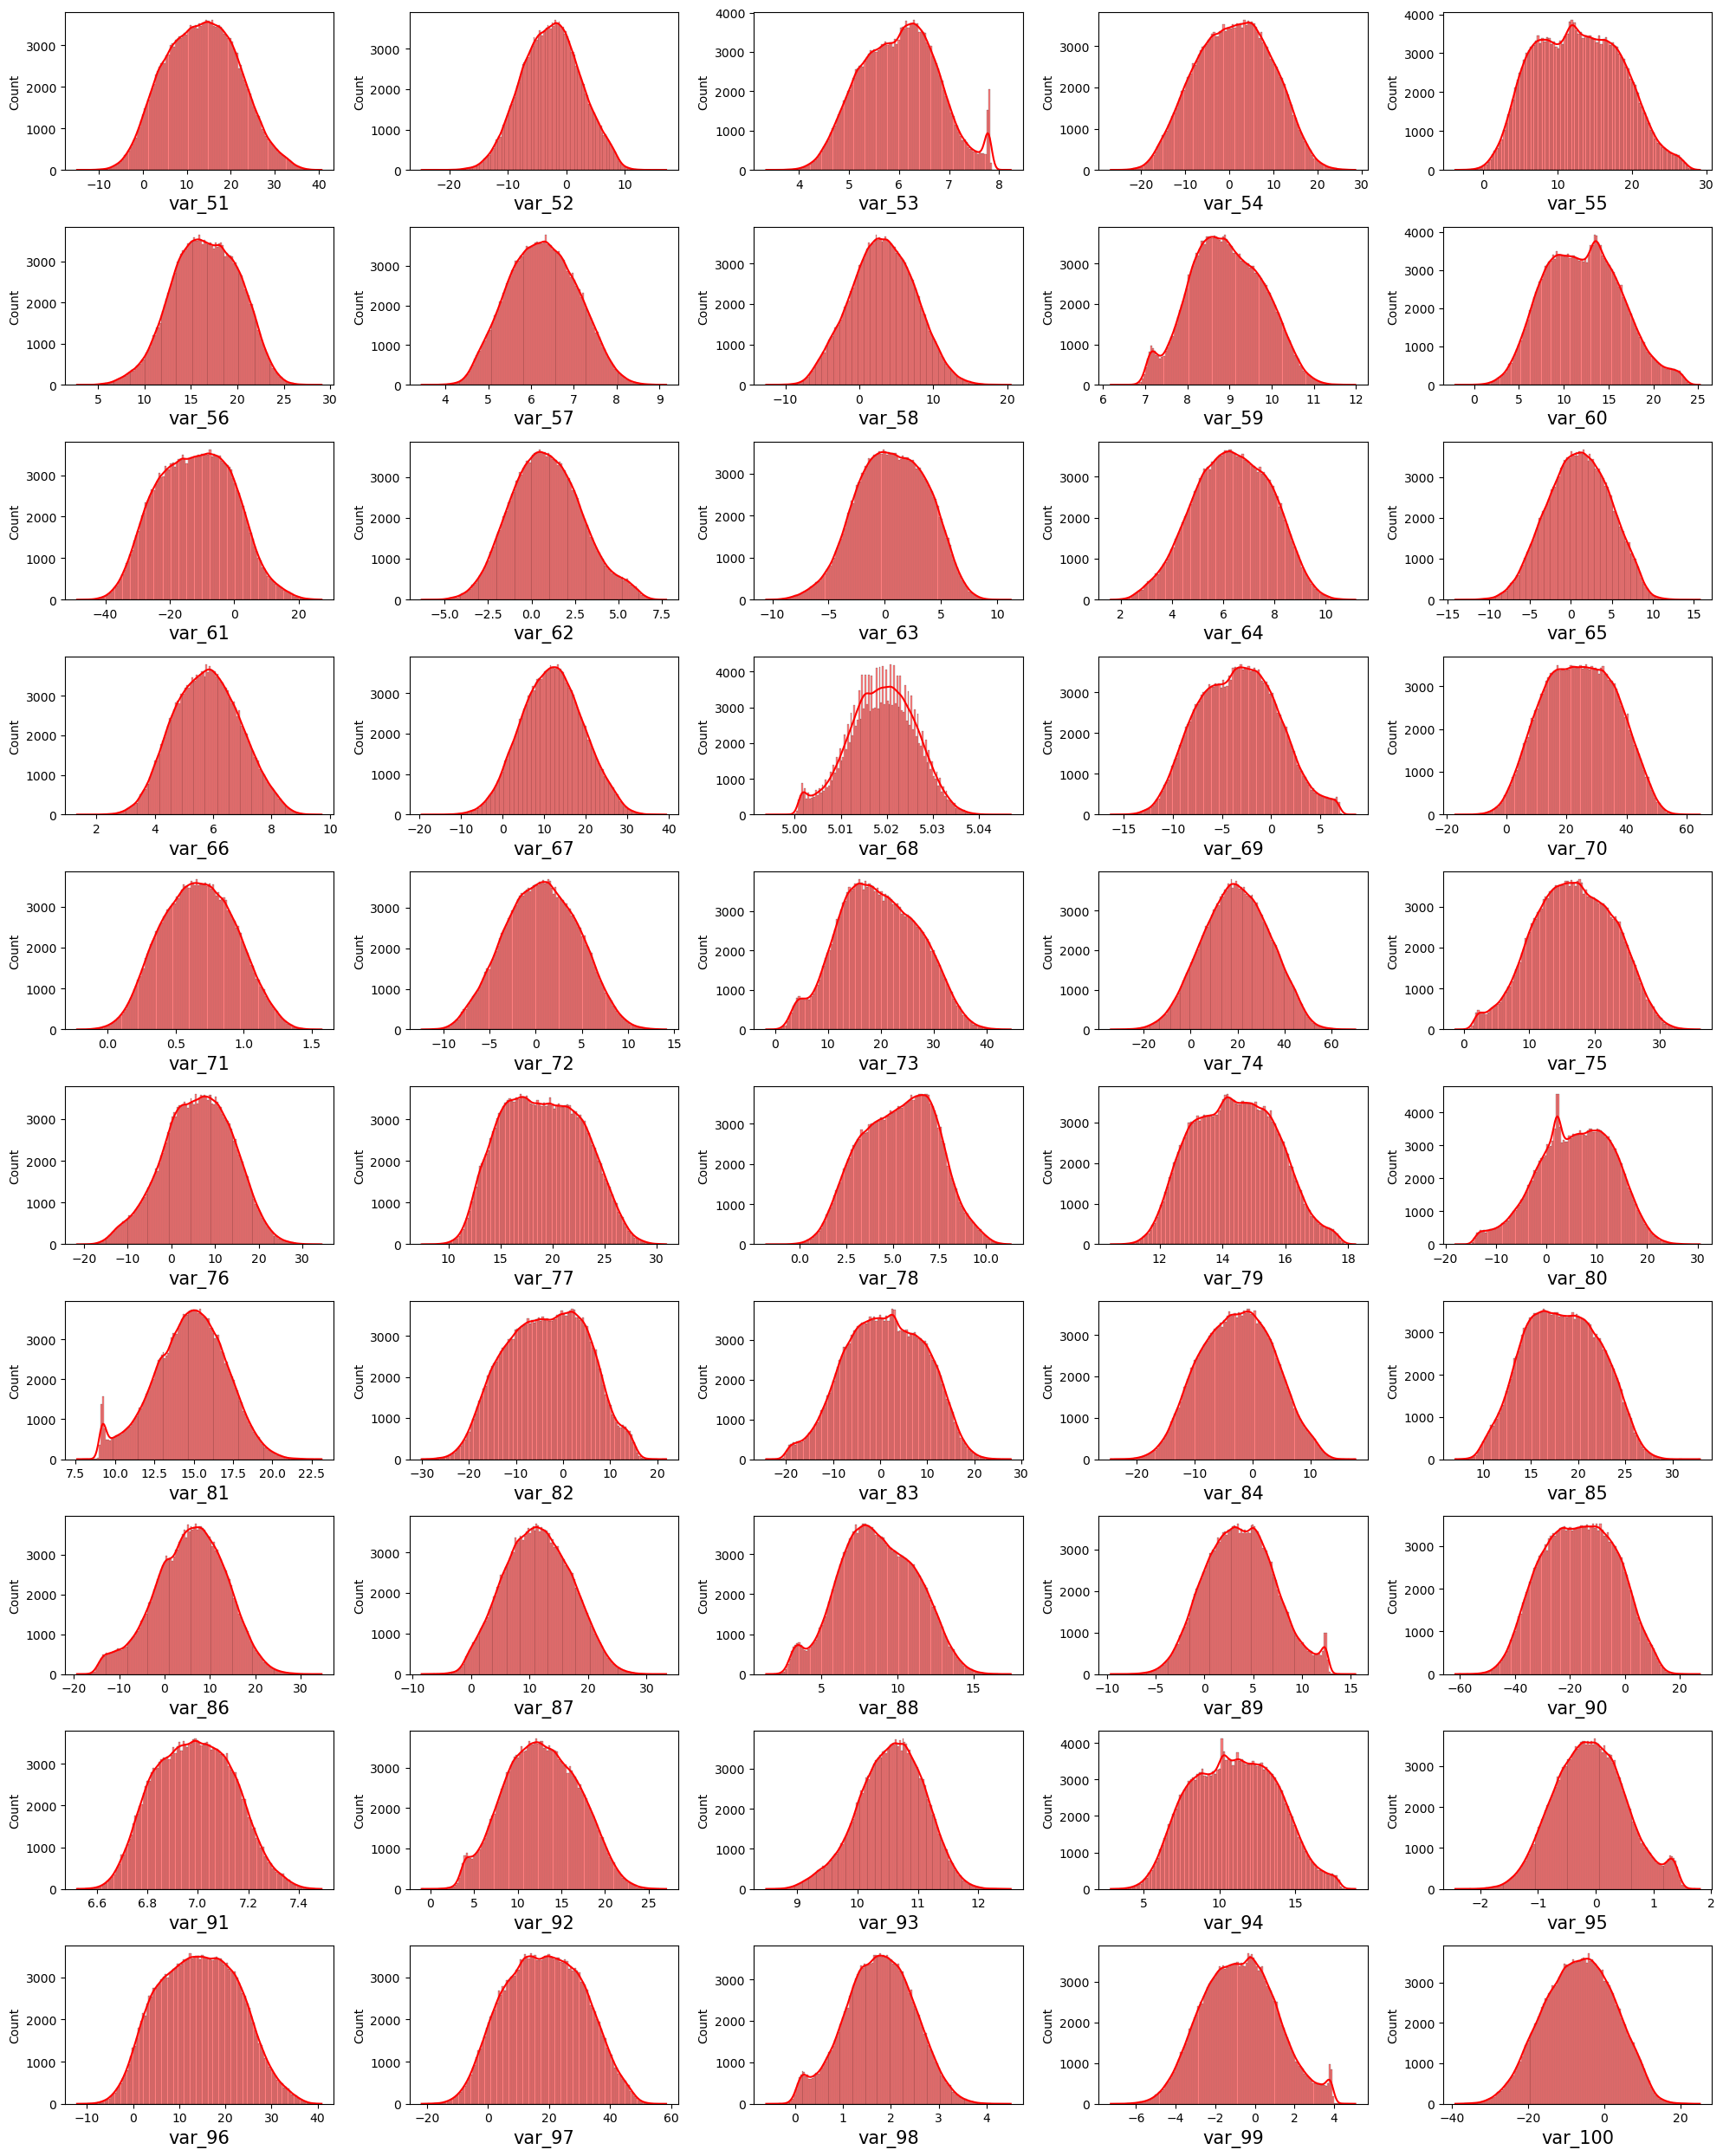

In [15]:
#Checking the distribution of the next 50 columns (var_51 to var_100)

dist2 = data.iloc[:,53:103]
plt.figure(figsize=(20,25))
plotno=1
for i in dist2:
    if plotno<=50:
        plt.subplot(10,5,plotno)
        sns.histplot(data[i],kde=True, color="red")
        plt.xlabel(i,fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

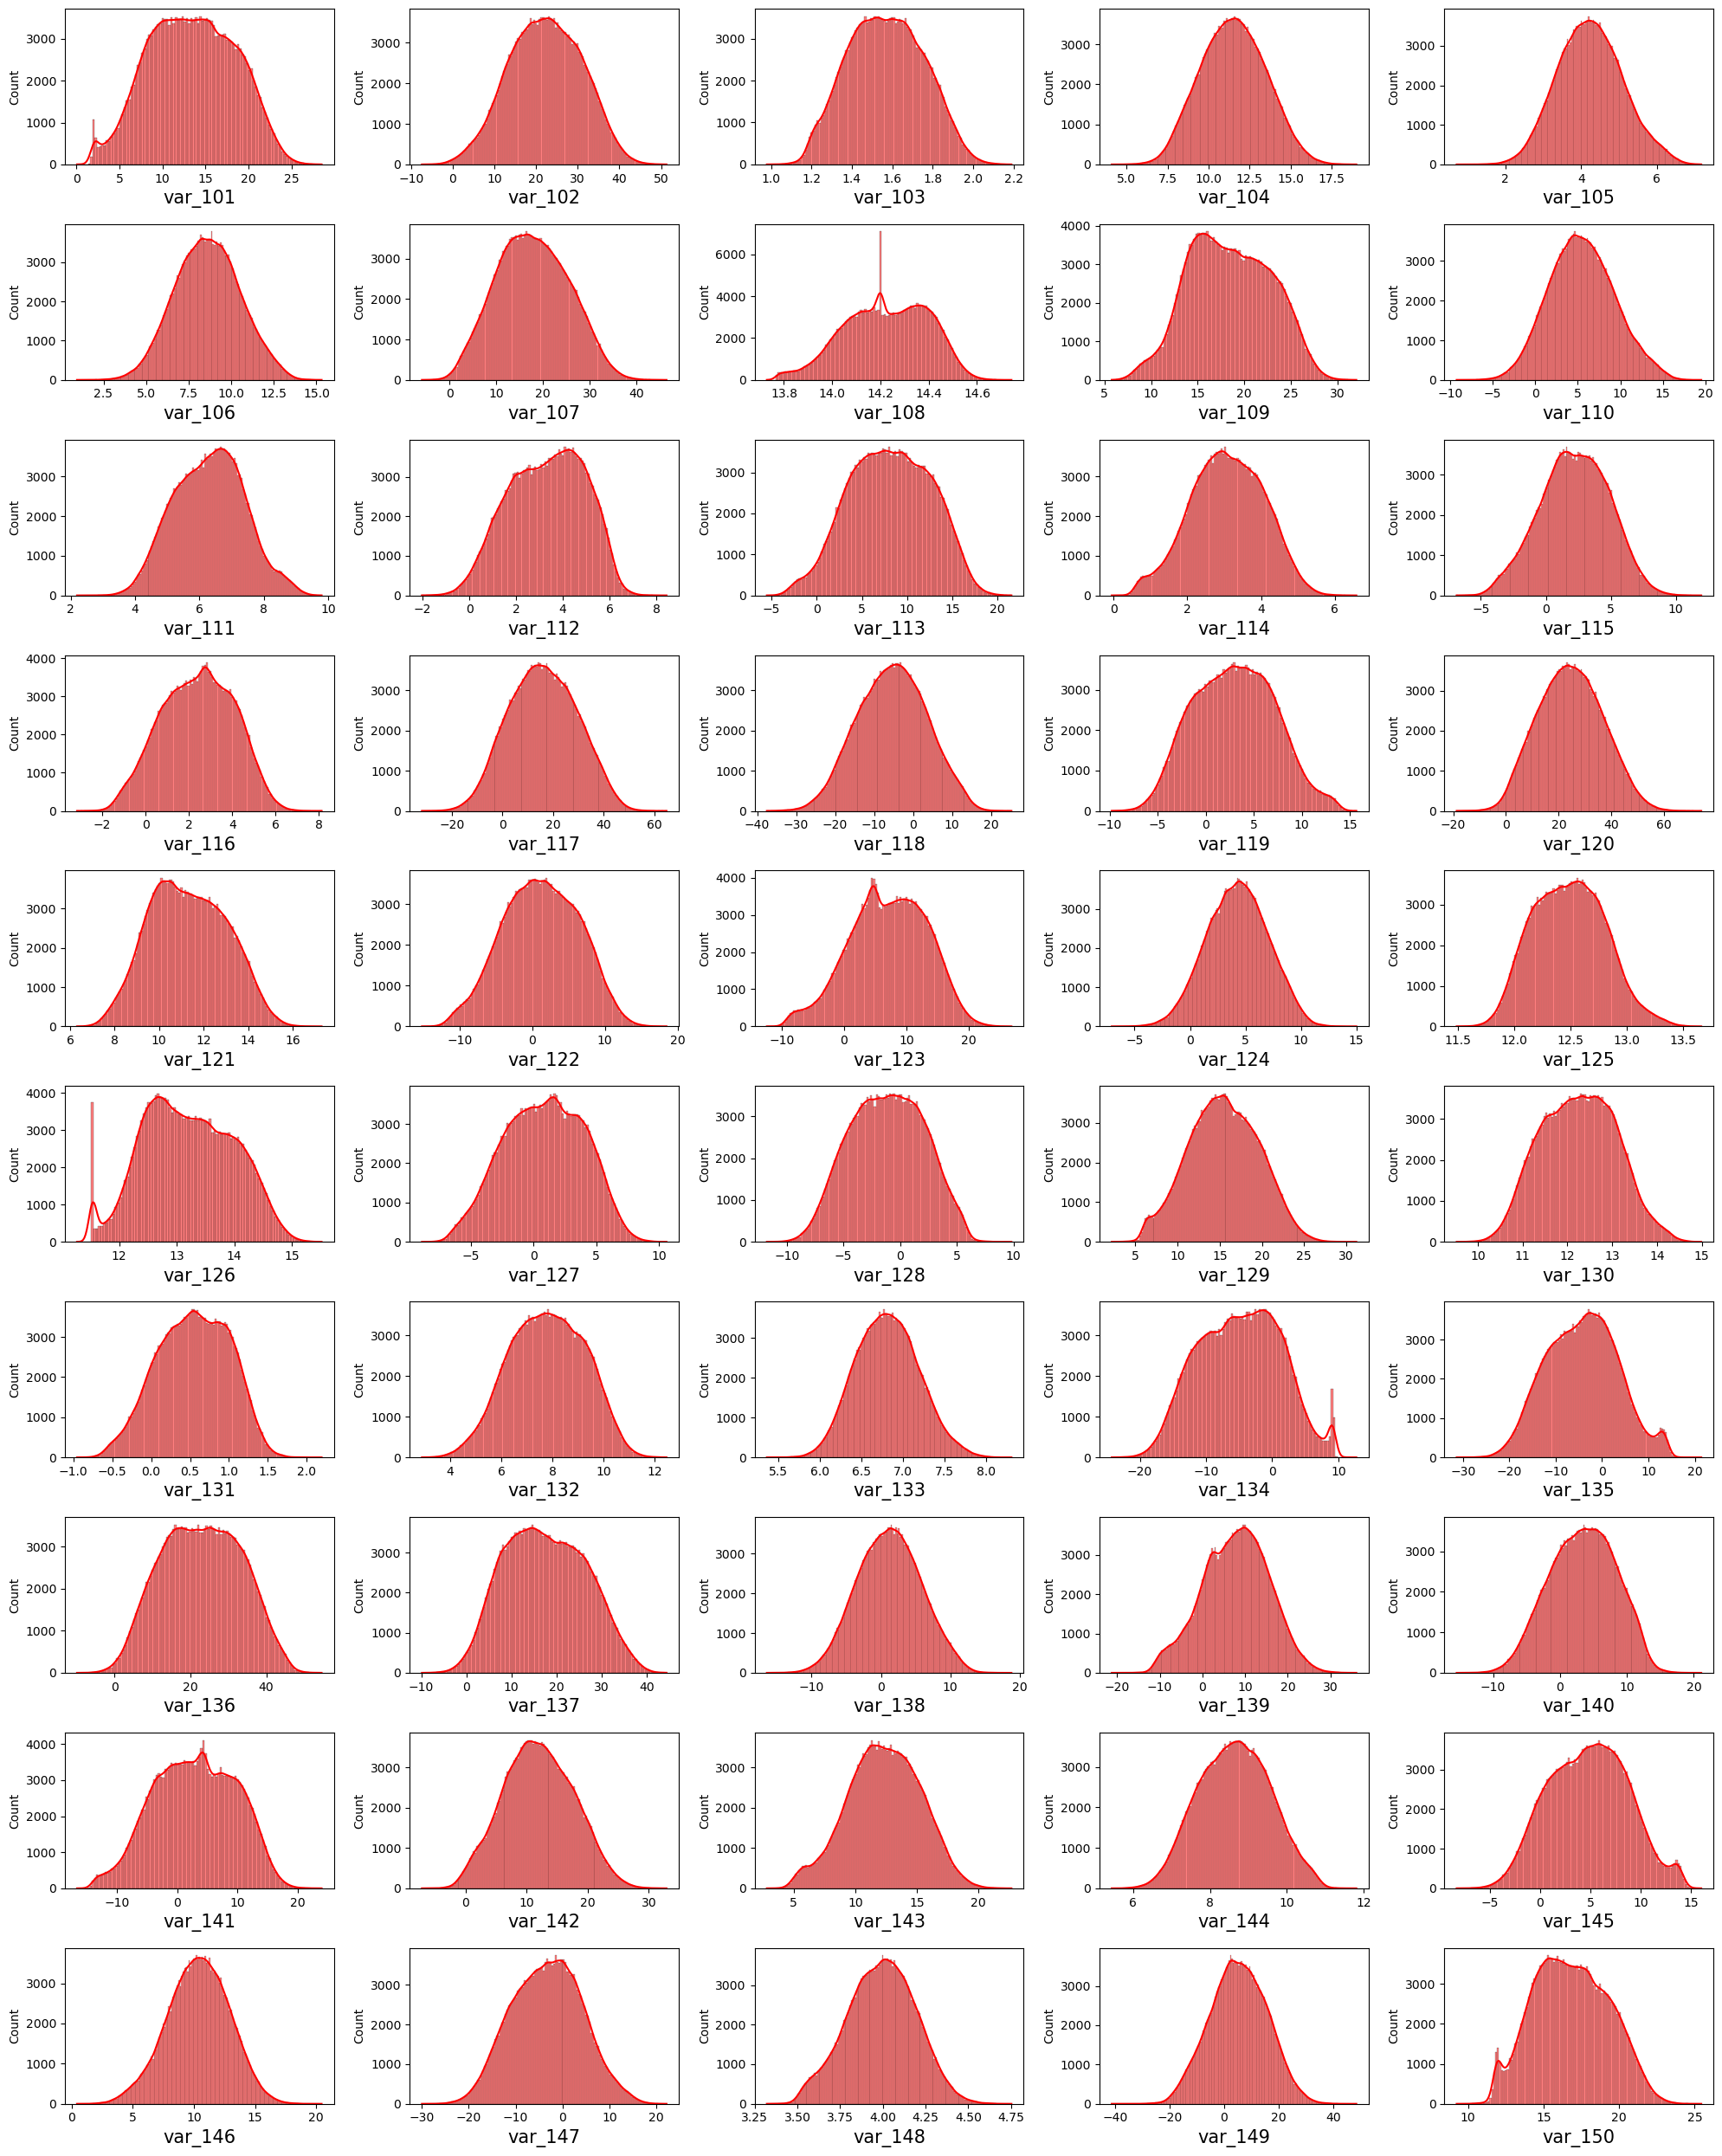

In [16]:
#Checking the distribution of the next 50 columns (var_101 to var_150)

dist3=data.iloc[:,103:153]
plt.figure(figsize=(20,25))
plotno=1
for i in dist3:
    if plotno<=50:
        plt.subplot(10,5,plotno)
        sns.histplot(data[i], kde=True, color="red")
        plt.xlabel(i, fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

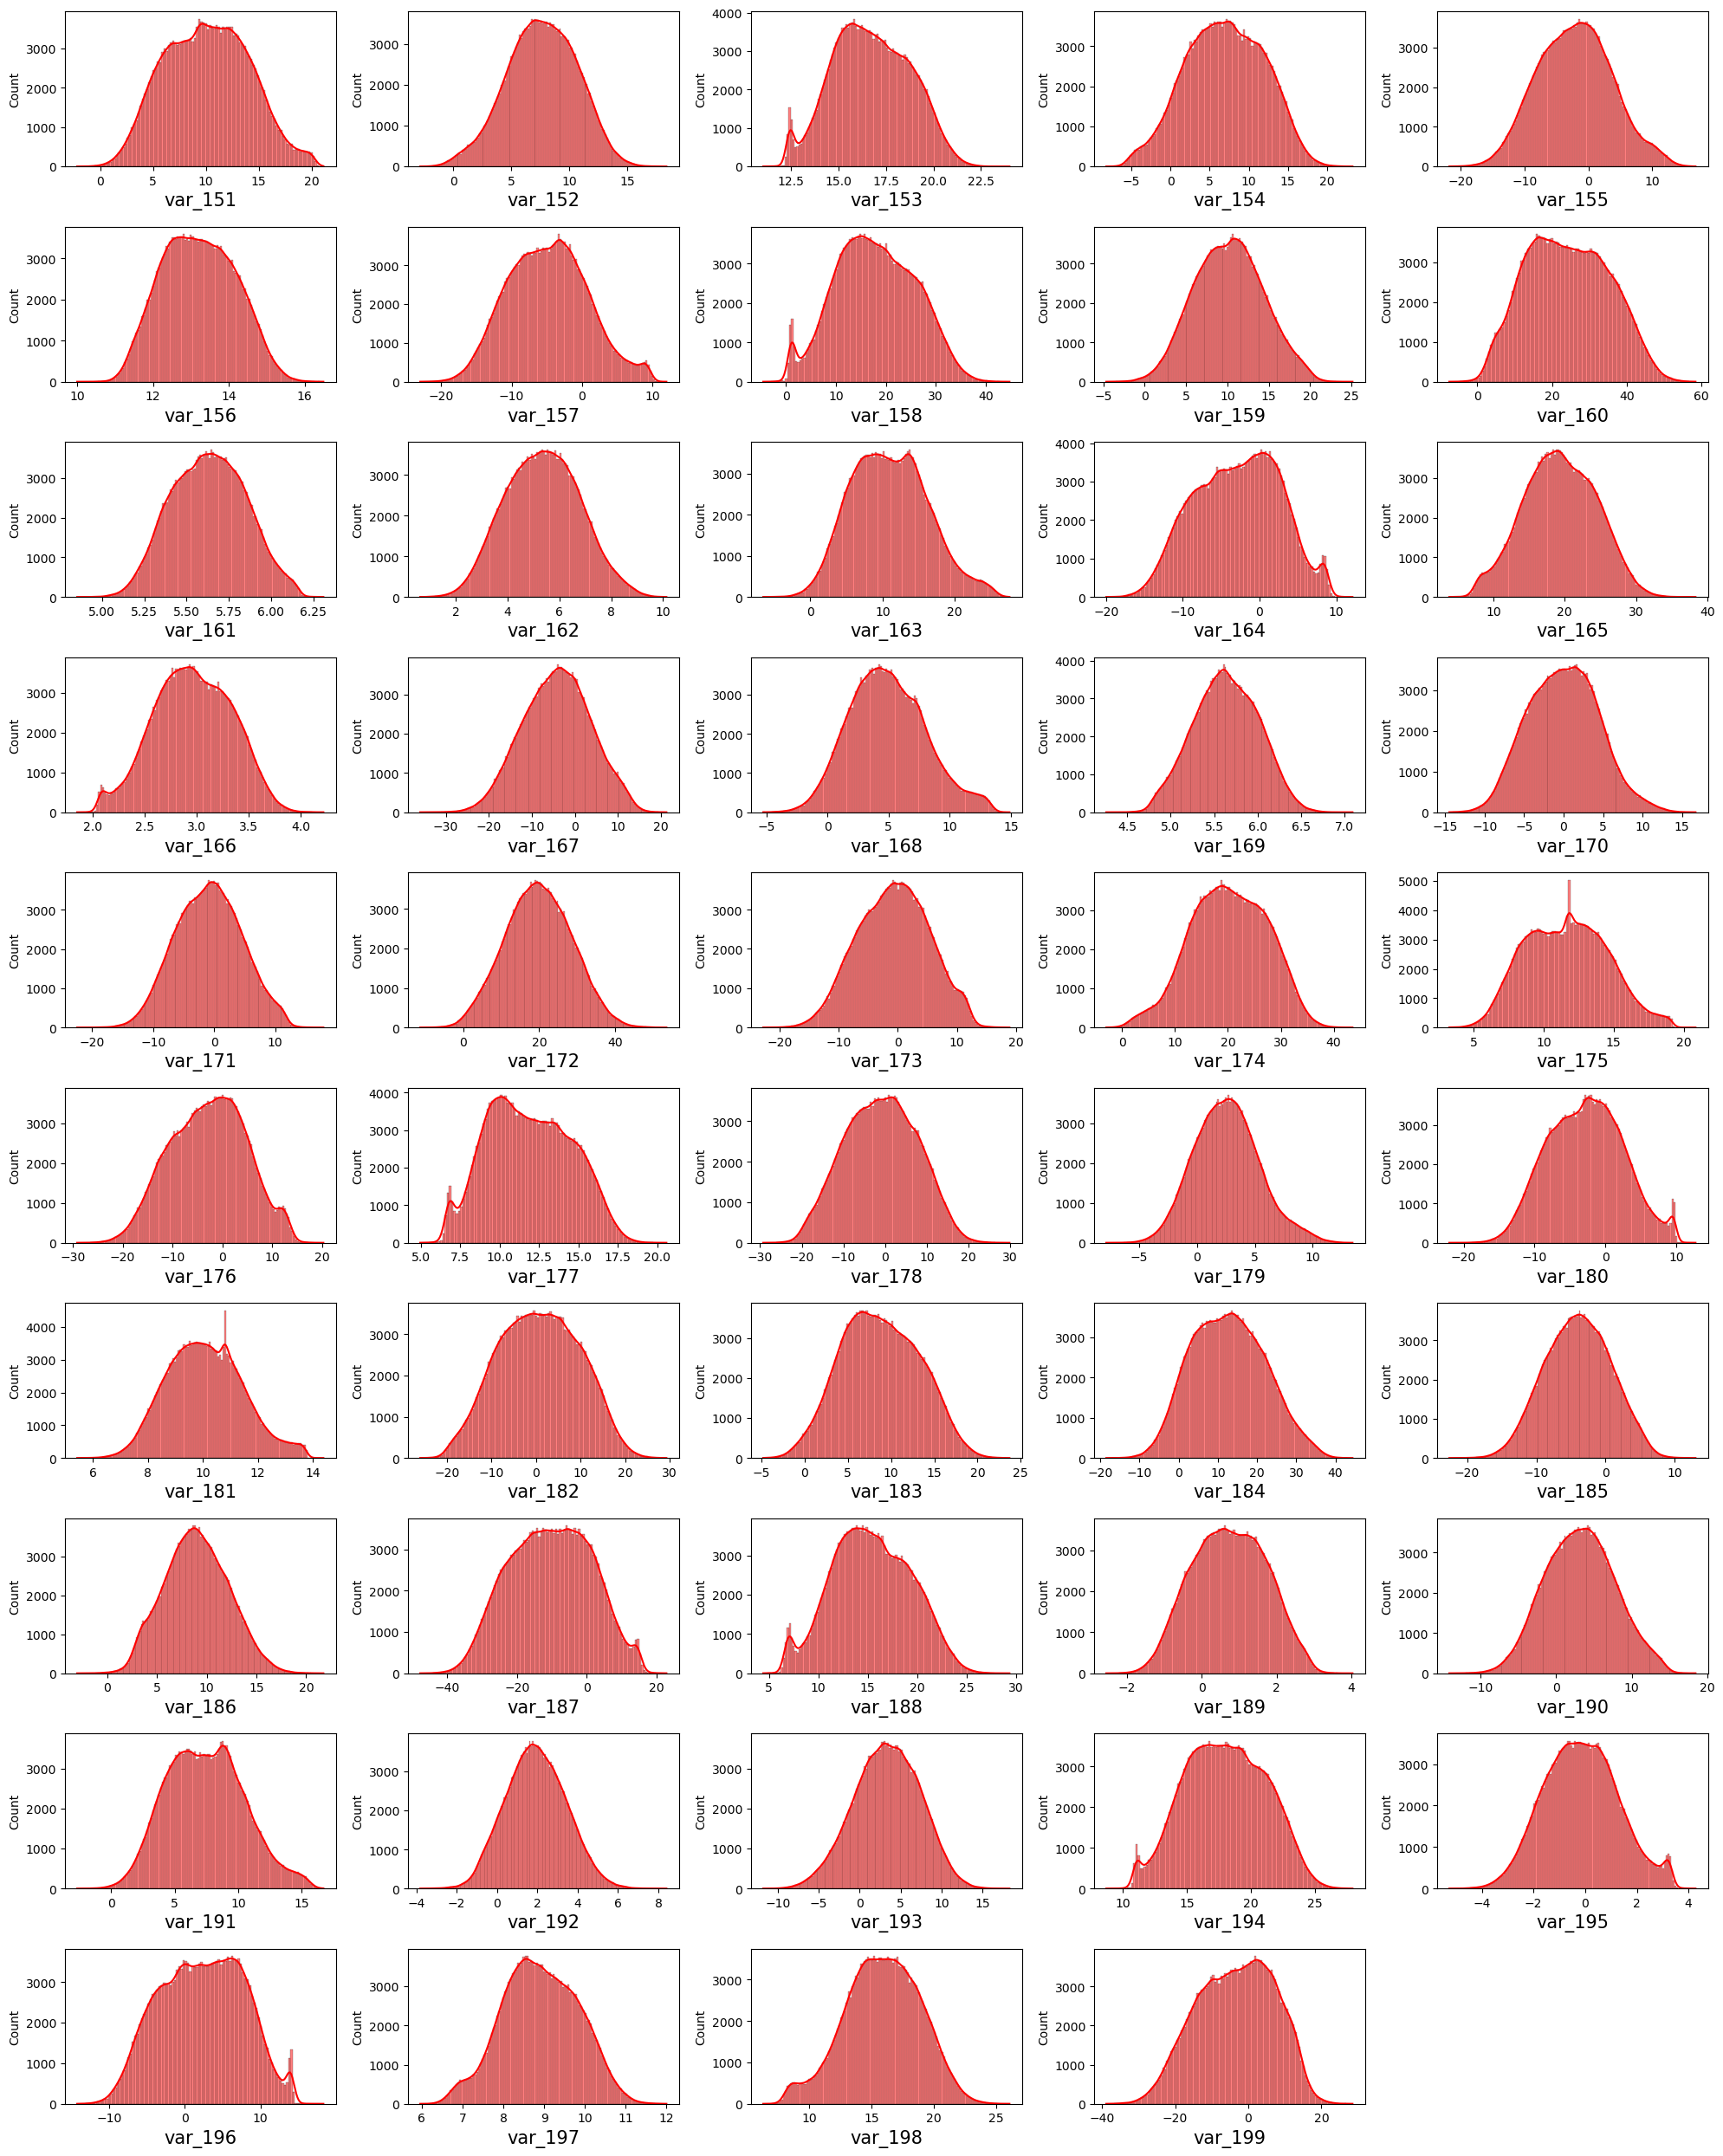

In [17]:
#Checking the distribution of the next 50 columns (var_151 to var_199)

dist4=data.iloc[:,153:203]

plt.figure(figsize=(20,25))
plotno=1
for i in dist4:
    if plotno<=50:
        plt.subplot(10,5,plotno)
        sns.histplot(data[i], kde=True, color="red")
        plt.xlabel(i, fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

* As per comparing the distribution plots of all the columns we can see that most of the data follow normal distribution
* Some columns are slightly different but they are close to normal distribution.

#### **CHECKING THE DISTRIBUTION OF MEAN AND STANDARD DEVIATION IN THE FEATURES**

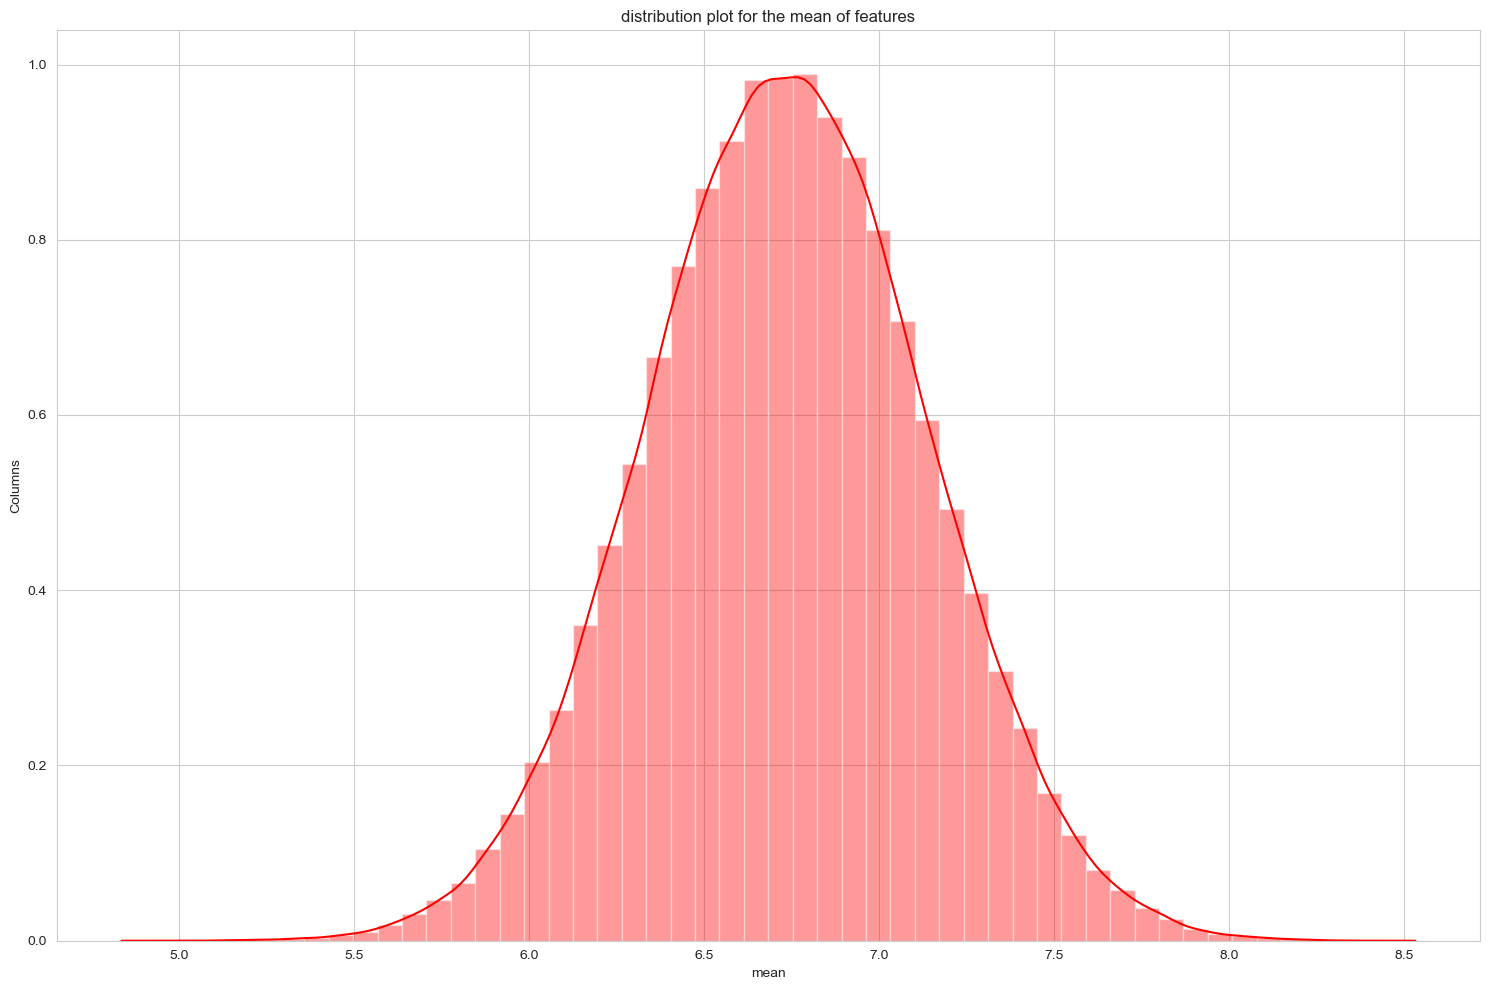

In [18]:
#checking the mean distribution
plt.figure(figsize=(15,10)) #mentioning the figure size
sns.set_style("whitegrid") #setting up the background grid
feature = data.columns.values[1:202]  #extracting the values in the features
sns.distplot(data[feature].mean(axis=1), kde=True, color='red') #plotting the mean values
plt.title("distribution plot for the mean of features")
plt.xlabel("mean")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

* The above graph looks like the normal distribution(gaussian distribution) with the mean value of 6.7
* Most of the data lies between the mean of 6.5 to 7.0

#### **DISTRIBUTION OF STANDARD DEVIATION OF THE DATA**

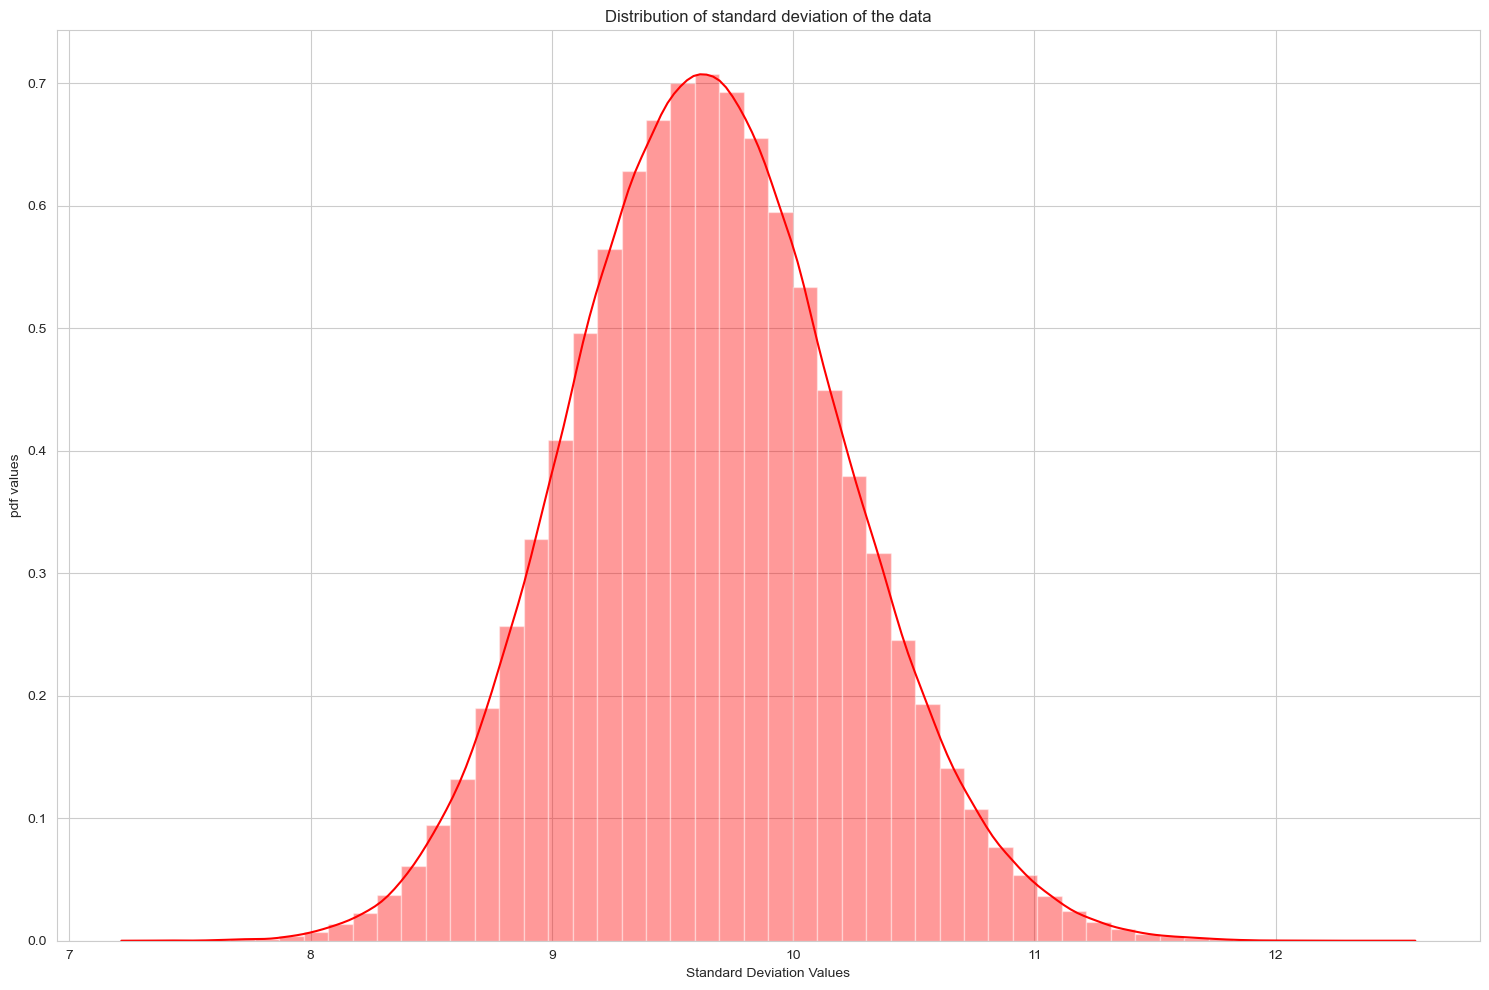

In [19]:
#Checking the standard deviation distribution

plt.figure(figsize=(15,10)) #mentioning the figure size
sns.set_style("whitegrid") #setting up the grid style
sns.distplot(data[feature].std(axis=1), kde=True, color='red') #plotting the std value of the features
plt.title("Distribution of standard deviation of the data") #setting the title of the plot
plt.xlabel("Standard Deviation Values") #setting the name of x axis
plt.ylabel("pdf values") #setting the name of y axis
plt.tight_layout() 
plt.show()

* The above graph is the normal distibuted plot (Gaussian Distribution) with most of the values lies between 9 to 10

### **5) DATA PREPROCESSING**

#### **CHECKING FOR MISSING VALUES**

In [20]:
#Checking the null values
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [21]:
#checking the null values along with the percentage with the userdefined function

def missing_values(data):
    null_values = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_values = pd.concat([null_values, percentage], axis=1, keys=['MISSING VALUE COUNTS', 'MISSING VALUE PERCENTAGE'])
    return null_values
pd.set_option('display.max_rows', None)
missing_values(data)

,MISSING VALUE COUNTS,MISSING VALUE PERCENTAGE
ID_code,0,0.0
target,0,0.0
var_0,0,0.0
var_1,0,0.0
var_2,0,0.0
var_3,0,0.0
var_4,0,0.0
var_5,0,0.0
var_6,0,0.0
var_7,0,0.0


* There is no missing values in the dataset

#### **OUTLIERS**

* From the EDA part we come to know that we have minimal outliers in the data
* Most of the features are in normal distribution and so there is no need to treat the outliers

#### **FEATURE SCALING**

In [22]:
from sklearn.preprocessing import RobustScaler #importing the module
scaler = RobustScaler() #creating object
#fitting the data for scaling
data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13',
      'var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26',
      'var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39',
      'var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52',
      'var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65',
      'var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78',
      'var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91',
      'var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103',
      'var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114',
      'var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125',
      'var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137',
      'var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
      'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161',
      'var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173',
      'var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185',
      'var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197',
      'var_198','var_199']]=scaler.fit_transform(data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13',
      'var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26',
      'var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39',
      'var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52',
      'var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65',
      'var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78',
      'var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91',
      'var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103',
      'var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114',
      'var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125',
      'var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137',
      'var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
      'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161',
      'var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173',
      'var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185',
      'var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197',
      'var_198','var_199']])

In [23]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,-0.957762,0.305583,0.773493,-0.043671,-1.114937,0.366513,-0.008174,-0.966624,-0.162739,-0.922003,1.501988,-0.287712,-0.087983,-0.412584,-0.697739,0.682295,-0.564694,-0.115641,0.311940,-0.548520,0.288457,0.576435,0.841940,-0.851126,0.348616,-0.299471,0.903673,-0.340591,0.581356,-0.981379,0.548539,0.115367,-0.193612,0.319345,1.040799,0.283599,0.173463,-1.324016,-0.105497,0.088093,-0.953893,0.180010,1.287471,0.258004,-0.771426,-0.161079,0.250831,-1.036505,-0.760518,-0.191132,0.969281,0.663865,0.953312,0.457902,-0.194641,1.045515,1.563864,0.014637,1.021941,-0.811881,-0.235622,-0.152782,-0.260393,0.797759,-0.940584,1.177347,0.171753,-0.770042,0.737181,0.354058,-1.091074,0.705281,-0.322230,0.354930,0.149136,-0.217689,0.526629,0.308423,0.631770,-0.169341,-1.068672,-0.245199,-0.889417,-0.256259,-0.788603,0.905459,0.326678,-0.415107,-0.116685,0.408769,-1.002733,1.191061,-0.009283,0.334864,-0.454611,1.145443,1.539743,0.354209,-0.037369,-0.441993,0.901512,-0.635917,0.267546,0.203524,-1.270972,-0.393360,-0.198976,0.038224,-0.019047,-0.655480,0.678865,-0.479367,-0.576777,-0.040617,-0.724279,-0.020919,-1.020520,0.573672,-0.345920,-0.166804,0.003252,0.448584,-0.285488,0.842093,-0.453821,1.045512,0.653827,0.403910,1.027436,0.252403,0.700201,0.661924,-0.828965,0.881523,-0.262672,0.034931,0.598285,0.337620,-1.233241,0.117986,0.866341,0.477374,0.108810,0.313432,0.015391,0.469908,0.456423,-0.694127,-1.039317,-0.002129,0.226414,-0.496664,-0.995956,-0.852672,-0.757186,1.106464,-0.907538,-0.478894,0.302331,1.120384,-0.275810,-0.750177,-0.992302,0.092748,0.431413,-0.155465,-0.900226,-0.683989,0.481938,-0.202353,-0.210354,-0.745271,-0.529248,0.172926,0.860504,0.965631,1.451151,0.656221,-0.535886,0.399552,-0.106880,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,train_1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,0.231733,-0.111621,1.356555,-0.005922,-0.026486,-0.597899,-1.428478,1.275230,-1.026186,-0.624927,1.325749,-1.055828,-1.256152,1.040491,0.471547,-0.579970,0.561012,-0.919817,-0.613938,-0.443401,-1.213627,-0.153128,-0.825920,0.449260,0.722049,-0.080039,-0.431143,0.134638,-0.016755,0.042161,0.514962,-0.376309,-0.789331,-1.308709,0.475694,-1.053919,-1.092571,-0.967908,0.772529,1.189818,0.759215,-0.943863,-0.018056,-0.229100,0.596677,-0.746539,0.673046,0.514992,0.647343,-0.207278,-0.026

#### **FEATURE SELECTION**

##### **DROPPING THE UNWANTED COLUMNS**

In [24]:
data.drop("ID_code", axis=1, inplace= True) #we don't need the ID code column so we are dropping this column

In [25]:
#data after dropping the unwanted feature
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,-0.957762,0.305583,0.773493,-0.043671,-1.114937,0.366513,-0.008174,-0.966624,-0.162739,-0.922003,1.501988,-0.287712,-0.087983,-0.412584,-0.697739,0.682295,-0.564694,-0.115641,0.311940,-0.548520,0.288457,0.576435,0.841940,-0.851126,0.348616,-0.299471,0.903673,-0.340591,0.581356,-0.981379,0.548539,0.115367,-0.193612,0.319345,1.040799,0.283599,0.173463,-1.324016,-0.105497,0.088093,-0.953893,0.180010,1.287471,0.258004,-0.771426,-0.161079,0.250831,-1.036505,-0.760518,-0.191132,0.969281,0.663865,0.953312,0.457902,-0.194641,1.045515,1.563864,0.014637,1.021941,-0.811881,-0.235622,-0.152782,-0.260393,0.797759,-0.940584,1.177347,0.171753,-0.770042,0.737181,0.354058,-1.091074,0.705281,-0.322230,0.354930,0.149136,-0.217689,0.526629,0.308423,0.631770,-0.169341,-1.068672,-0.245199,-0.889417,-0.256259,-0.788603,0.905459,0.326678,-0.415107,-0.116685,0.408769,-1.002733,1.191061,-0.009283,0.334864,-0.454611,1.145443,1.539743,0.354209,-0.037369,-0.441993,0.901512,-0.635917,0.267546,0.203524,-1.270972,-0.393360,-0.198976,0.038224,-0.019047,-0.655480,0.678865,-0.479367,-0.576777,-0.040617,-0.724279,-0.020919,-1.020520,0.573672,-0.345920,-0.166804,0.003252,0.448584,-0.285488,0.842093,-0.453821,1.045512,0.653827,0.403910,1.027436,0.252403,0.700201,0.661924,-0.828965,0.881523,-0.262672,0.034931,0.598285,0.337620,-1.233241,0.117986,0.866341,0.477374,0.108810,0.313432,0.015391,0.469908,0.456423,-0.694127,-1.039317,-0.002129,0.226414,-0.496664,-0.995956,-0.852672,-0.757186,1.106464,-0.907538,-0.478894,0.302331,1.120384,-0.275810,-0.750177,-0.992302,0.092748,0.431413,-0.155465,-0.900226,-0.683989,0.481938,-0.202353,-0.210354,-0.745271,-0.529248,0.172926,0.860504,0.965631,1.451151,0.656221,-0.535886,0.399552,-0.106880,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,0.231733,-0.111621,1.356555,-0.005922,-0.026486,-0.597899,-1.428478,1.275230,-1.026186,-0.624927,1.325749,-1.055828,-1.256152,1.040491,0.471547,-0.579970,0.561012,-0.919817,-0.613938,-0.443401,-1.213627,-0.153128,-0.825920,0.449260,0.722049,-0.080039,-0.431143,0.134638,-0.016755,0.042161,0.514962,-0.376309,-0.789331,-1.308709,0.475694,-1.053919,-1.092571,-0.967908,0.772529,1.189818,0.759215,-0.943863,-0.018056,-0.229100,0.596677,-0.746539,0.673046,0.514992,0.647343,-0.207278,-0.026154,-0.653387,0.263081,0

#### **CHECKING THE CORRELATION**

In [26]:
#creating the object to store the correlation value
corr_data = data.corr()

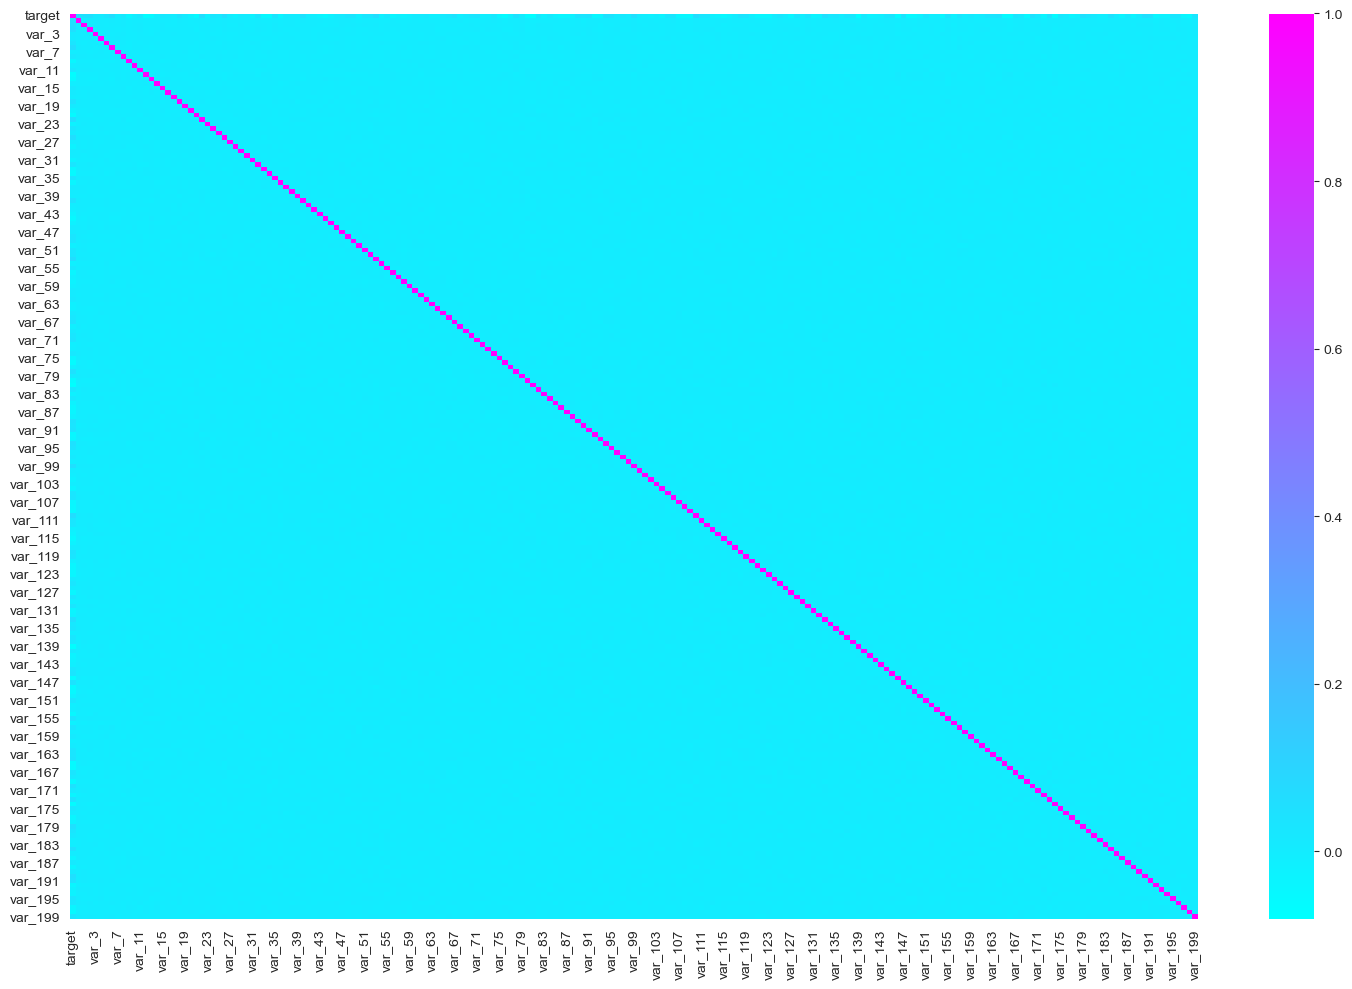

In [27]:
#plotting the heatmap with the correlation data

plt.figure(figsize=(15,10)) #defining the figure size
sns.heatmap(data=corr_data, annot=False, cmap='cool') #plotting the correlation data
plt.tight_layout()
plt.show()

* From the above correlation matrix, we come to know that no features are highly correlated in the dataset
* There is no need to reduct the highly correlated features

In [28]:
#lets check for hightly correlated values with the python code
pd.set_option('display.max_rows', None) #to display the maximum rows in the output dataframe
corr_data = corr_data.abs() #to take the absolute value of the correlation 
corr_data = corr_data.unstack() #to change the matrix format and make it as a readable format
corr_data = corr_data.sort_values(ascending = True) #sorting the values in the ascending order
corr_data = corr_data[corr_data>=0.9] #taking the highly correlated value as 0.9
corr_data = corr_data[corr_data<1] #filtering the value 1
corr_data = pd.DataFrame(corr_data).reset_index() #converting the data into dataframe
corr_data.columns = ['feature1', 'feature2', 'corr_value'] #changing the column names for better understanding

In [29]:
corr_data #printing the dataframe

,feature1,feature2,corr_value


* We can see there is no highly correlated features in the dataset

#### **PRINCIPLE COMPONENT ANALYSIS**

In [30]:
from sklearn.decomposition import PCA #importing the library
pca = PCA() #object creation
principlecomponent = pca.fit_transform(data) #fitting the data in the object created

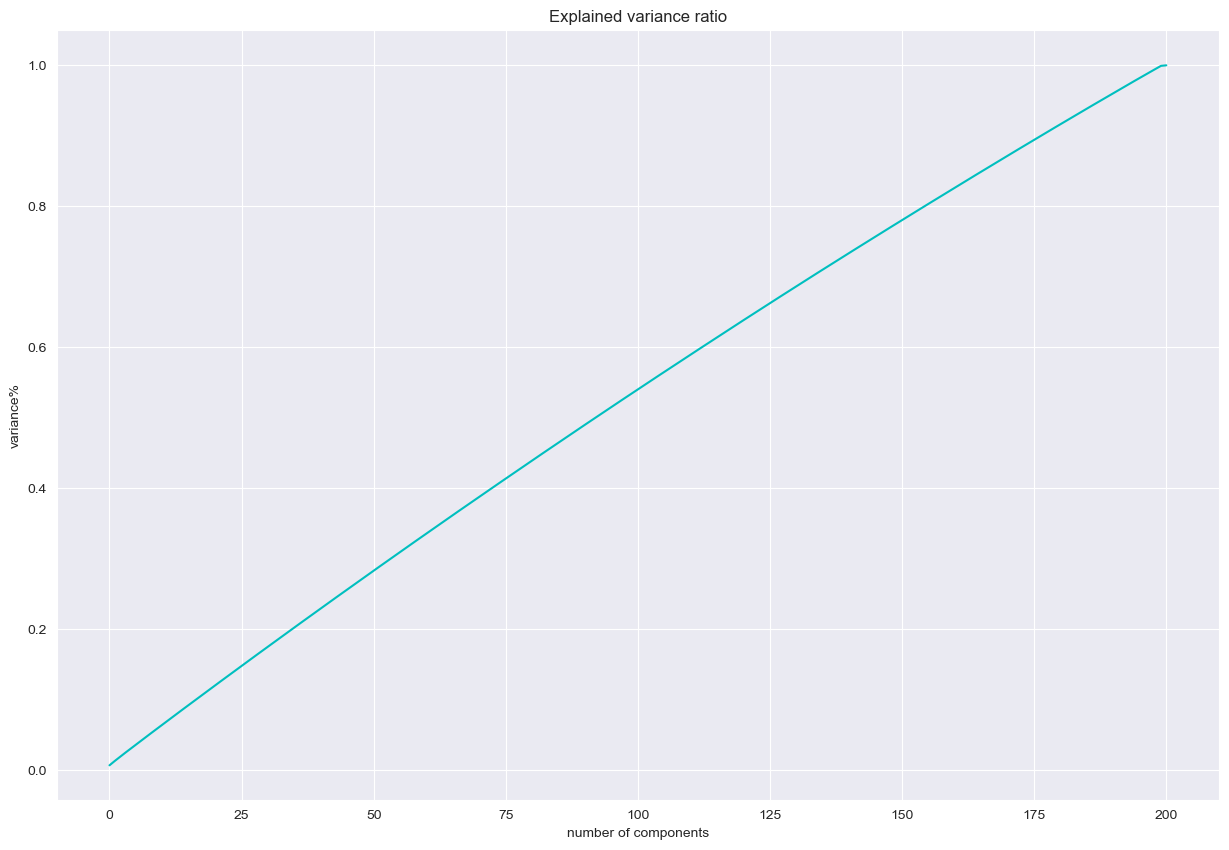

In [31]:
#plotting the explained variance ratio
plt.figure(figsize = (15,10))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='c')
plt.xlabel('number of components')
plt.ylabel('variance%')
plt.title('Explained variance ratio')
plt.show()

In [32]:
#implementing the PCA in the data
pca = PCA(n_components = 150) #creating the object with 150 components
new_data = pca.fit_transform(data) #fitting the data in the object
new_data #printing the data

array([[ 0.51758867,  0.26955976,  0.05402251, ..., -0.33145128,
         0.10315102, -1.97921584],
       [-1.32400732, -0.53357927,  1.95817087, ..., -0.14653297,
        -0.13576336, -0.82429411],
       [ 0.04224386, -0.81522866, -0.3257926 , ..., -0.3321169 ,
         0.16570998, -1.1078981 ],
       ...,
       [-0.01423866,  0.55522966,  0.65142503, ...,  0.47421069,
         0.24287027,  0.28133443],
       [ 0.40689894,  0.23820526,  0.38221209, ...,  0.05696725,
         0.61160151, -0.62463344],
       [ 0.76575485, -0.16503883,  0.39951196, ..., -0.7212232 ,
         0.21543879,  0.65288402]])

In [33]:
#Creating a dataframe with the PCA output array
pca_data = pd.DataFrame(data = new_data, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33','pca34',
                            'pca35','pca36','pca37','pca38','pca39','pca40','pca41','pca42','pca43','pca44','pca45','pca46',
                            'pca47','pca48','pca49','pca50','pca51','pca52','pca53','pca54','pca55','pca56','pca57','pca58',
                            'pca59','pca60','pca61','pca62','pca63','pca64','pca65','pca66','pca67','pca68','pca69','pca70',
                            'pca71','pca72','pca73','pca74','pca75','pca76','pca77','pca78','pca79','pca80','pca81','pca82',
                            'pca83','pca84','pca85','pca86','pca87','pca88','pca89','pca90','pca91','pca92','pca93','pca94',
                            'pca95','pca96','pca97','pca98','pca99','pca100','pca101','pca102','pca103','pca104','pca105',
                            'pca106','pca107','pca108','pca109','pca110','pca111','pca112','pca113','pca114','pca115','pca116',
                            'pca117','pca118','pca119','pca120','pca121','pca122','pca123','pca124','pca125','pca126','pca127',
                            'pca128','pca129','pca130','pca131','pca132','pca133','pca134','pca135','pca136','pca137','pca138',
                            'pca139','pca140','pca141','pca142','pca143','pca144','pca145','pca146','pca147','pca148','pca149',
                            'pca150'])

In [34]:
pca_data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144,pca145,pca146,pca147,pca148,pca149,pca150
0,0.517589,0.269560,0.054023,-0.369893,0.835381,0.662795,1.319730,1.064223,-0.849499,0.433281,0.099748,0.189458,0.036275,0.666101,-0.022342,-0.761547,-0.166639,0.030342,-0.068087,1.435869,0.548179,1.059613,-1.190722,-0.729638,-0.071145,0.078544,-0.887911,-0.807112,0.012292,-0.763784,-0.274470,-0.372900,-0.263387,-0.002814,-0.656367,-0.047525,0.682693,0.054722,0.088106,0.400059,0.216680,-0.921100,0.608908,0.340632,0.704269,-0.170687,-0.654300,1.061424,-0.483177,1.065057,-1.490633,0.388312,-0.253202,0.513145,1.014501,-0.233567,-0.107051,-0.773744,0.066686,-0.477828,0.881100,0.525298,1.033929,0.201180,-0.691202,-0.487673,0.445280,-0.124135,-1.776024,-0.074610,-0.685690,0.032297,0.050818,0.034366,0.397986,-1.170827,0.368282,0.595141,1.006387,-0.382024,-0.535029,-0.493931,0.756615,0.714640,0.164489,0.506951,0.682040,-0.319673,1.048802,0.270264,0.624894,0.068417,-0.701790,0.475613,-0.198829,-0.755601,0.329829,-0.150092,1.165510,-1.094786,0.607245,0.807198,0.182657,0.224932,-1.100740,0.356435,0.452096,0.107081,-0.001502,1.180537,-0.631718,-0.756883,-1.088512,-0.304309,-0.186437,0.176686,-0.926008,-0.804948,0.792421,-1.048378,-0.797376,1.107738,0.291139,-0.053988,-1.002628,0.755661,-0.211778,0.234515,0.266976,-0.328136,0.648342,0.498883,0.522072,0.584286,-0.637994,0.123388,-0.333348,1.680633,0.620728,-0.031284,0.976753,-0.287220,0.397111,-0.959304,0.769188,-0.401486,-0.294892,-0.331451,0.103151,-1.979216
1,-1.324007,-0.533579,1.958171,1.308587,0.328150,0.049564,-1.179654,0.139923,0.443926,0.601061,0.507448,0.290780,-2.031748,-1.611884,-0.508465,0.886412,-0.154350,-0.436477,-0.736805,-0.529373,1.095882,-0.959536,1.069778,1.143183,2.077901,-0.579774,1.045354,0.939488,0.376925,0.163353,0.055867,-0.105673,0.970089,0.221928,0.833694,1.083230,-0.575362,1.052924,-0.173764,-0.949257,-0.279215,-0.698407,0.107007,-0.484972,-1.349184,0.738426,-0.073452,-0.602862,0.583670,-0.220609,0.306837,-0.204201,-0.228406,0.633989,-0.153384,0.466705,-0.628820,-0.603458,-1.086874,1.179418,0.334649,0.610178,-0.116334,0.111064,-0.683004,1.137632,-0.223746,-0.423983,0.800753,0.838010,-0.190419,-0.771438,0.256354,0.129691,-0.351200,0.497553,-1.241447,-0.499981,0.798423,-0.622427,-0.289117,0.650573,-0.136576,0.584297,0.110860,0.206038,0.438245,-0.541694,0.912810,0.077358,0.330347,1.128143,0.679547,-0.558082,0.370086,0.233700,-0.451091,0.351500,0.282666,1.002136,0.024931,1.136643,-0.046010,-0.513514,1.083092,1.365194,0.171206,0.028797,-0.311181,0.808733,0.251169,-0.152583,0.291193,-0.772977,0.671171,1.461625,0.492782,-0.479170,0.949655,0.332061,-0.031731,-0.234562,0.318108,-1.348991,-0.399963,-0.732549,-0.580642,0.558389,0.892253,0.425669,0.031629,-0.310980,-1.470945,-0.416889,-0.153782,-0.568804,-0.402385,-0.219356,0.999554,0.168548,-1.378714,-0.271024,-1.007259,-0.113012,1.321660,0.125102,-0.335331,-0.146533,-0.135763,-0.824294
2,0.042244,-0.815229,-0.325793,0.225673,-0.013017,0.143188,0.106796,-0.226355,-0.768914,0.082743,-0.648765,-0.886855,-0.286661,-0.767624,-0.820481,-0.284385,0.659575,-0.058761,-0.454473,-0.344158,-0.991155,-0.57836

#### **SPILITTING THE INDEPENDENT AND DEPENDENT VARIABLE**

In [35]:
X = pca_data
y = data["target"]

In [36]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144,pca145,pca146,pca147,pca148,pca149,pca150
0,0.517589,0.269560,0.054023,-0.369893,0.835381,0.662795,1.319730,1.064223,-0.849499,0.433281,0.099748,0.189458,0.036275,0.666101,-0.022342,-0.761547,-0.166639,0.030342,-0.068087,1.435869,0.548179,1.059613,-1.190722,-0.729638,-0.071145,0.078544,-0.887911,-0.807112,0.012292,-0.763784,-0.274470,-0.372900,-0.263387,-0.002814,-0.656367,-0.047525,0.682693,0.054722,0.088106,0.400059,0.216680,-0.921100,0.608908,0.340632,0.704269,-0.170687,-0.654300,1.061424,-0.483177,1.065057,-1.490633,0.388312,-0.253202,0.513145,1.014501,-0.233567,-0.107051,-0.773744,0.066686,-0.477828,0.881100,0.525298,1.033929,0.201180,-0.691202,-0.487673,0.445280,-0.124135,-1.776024,-0.074610,-0.685690,0.032297,0.050818,0.034366,0.397986,-1.170827,0.368282,0.595141,1.006387,-0.382024,-0.535029,-0.493931,0.756615,0.714640,0.164489,0.506951,0.682040,-0.319673,1.048802,0.270264,0.624894,0.068417,-0.701790,0.475613,-0.198829,-0.755601,0.329829,-0.150092,1.165510,-1.094786,0.607245,0.807198,0.182657,0.224932,-1.100740,0.356435,0.452096,0.107081,-0.001502,1.180537,-0.631718,-0.756883,-1.088512,-0.304309,-0.186437,0.176686,-0.926008,-0.804948,0.792421,-1.048378,-0.797376,1.107738,0.291139,-0.053988,-1.002628,0.755661,-0.211778,0.234515,0.266976,-0.328136,0.648342,0.498883,0.522072,0.584286,-0.637994,0.123388,-0.333348,1.680633,0.620728,-0.031284,0.976753,-0.287220,0.397111,-0.959304,0.769188,-0.401486,-0.294892,-0.331451,0.103151,-1.979216
1,-1.324007,-0.533579,1.958171,1.308587,0.328150,0.049564,-1.179654,0.139923,0.443926,0.601061,0.507448,0.290780,-2.031748,-1.611884,-0.508465,0.886412,-0.154350,-0.436477,-0.736805,-0.529373,1.095882,-0.959536,1.069778,1.143183,2.077901,-0.579774,1.045354,0.939488,0.376925,0.163353,0.055867,-0.105673,0.970089,0.221928,0.833694,1.083230,-0.575362,1.052924,-0.173764,-0.949257,-0.279215,-0.698407,0.107007,-0.484972,-1.349184,0.738426,-0.073452,-0.602862,0.583670,-0.220609,0.306837,-0.204201,-0.228406,0.633989,-0.153384,0.466705,-0.628820,-0.603458,-1.086874,1.179418,0.334649,0.610178,-0.116334,0.111064,-0.683004,1.137632,-0.223746,-0.423983,0.800753,0.838010,-0.190419,-0.771438,0.256354,0.129691,-0.351200,0.497553,-1.241447,-0.499981,0.798423,-0.622427,-0.289117,0.650573,-0.136576,0.584297,0.110860,0.206038,0.438245,-0.541694,0.912810,0.077358,0.330347,1.128143,0.679547,-0.558082,0.370086,0.233700,-0.451091,0.351500,0.282666,1.002136,0.024931,1.136643,-0.046010,-0.513514,1.083092,1.365194,0.171206,0.028797,-0.311181,0.808733,0.251169,-0.152583,0.291193,-0.772977,0.671171,1.461625,0.492782,-0.479170,0.949655,0.332061,-0.031731,-0.234562,0.318108,-1.348991,-0.399963,-0.732549,-0.580642,0.558389,0.892253,0.425669,0.031629,-0.310980,-1.470945,-0.416889,-0.153782,-0.568804,-0.402385,-0.219356,0.999554,0.168548,-1.378714,-0.271024,-1.007259,-0.113012,1.321660,0.125102,-0.335331,-0.146533,-0.135763,-0.824294
2,0.042244,-0.815229,-0.325793,0.225673,-0.013017,0.143188,0.106796,-0.226355,-0.768914,0.082743,-0.648765,-0.886855,-0.286661,-0.767624,-0.820481,-0.284385,0.659575,-0.058761,-0.454473,-0.344158,-0.991155,-0.57836

In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

#### **SMOTE (Synthetic Minority Oversampling Technique)**


* We have imbalanced data so we are performing the SMOTE Oversampling technique to balance the data
* SMOTE generates data points from the nearest neighbors of minority class

In [38]:
#SMOTE (Synthetic Minority Oversampling Technique)
from collections import Counter #importing the counter to check the count of data
from imblearn.over_sampling import SMOTE #importing the SMOTE module
sm = SMOTE() #object creation 
print ("Unbalanced data : ", Counter(y)) #checking the count before SMOTE
x_sm, y_sm = sm.fit_resample(X,y) #fitting the data in the SMOTE module
print ("balanced data : ", Counter(y_sm)) #checking the count after SMOTE

Unbalanced data :  Counter({0: 179902, 1: 20098})


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


balanced data :  Counter({0: 179902, 1: 179902})


* After SMOTE we got the balanced data with equal distribution

#### **SPLITTING OF DATA AS TRAINING DATA AND TEST DATA**

In [39]:
#Performing the data split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.30, random_state = 42)

In [40]:
#Checking the shape of all the splitted data
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is (251862, 150)
The shape of X_test is (107942, 150)
The shape of y_train is (251862,)
The shape of y_test is (107942,)


### **6) MODEL BUILDING**

In [41]:
#Importing the metrics to check the values
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score

#### <center> **A) LOGISTIC REGRESSION** </center>

In [42]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression #importing the library
log = LogisticRegression() #object creation
log.fit(X_train, y_train) #fitting the Training data in to the object
log_train_y_predict = log.predict(X_train) #prediction of training data
log_test_y_predict = log.predict(X_test) #rediction of Testing data

In [43]:
print("The accuracy score of Training data for logistic regression is", accuracy_score(log_train_y_predict, y_train))
print("The accuracy score of Testing data for logistic regression is", accuracy_score(log_test_y_predict, y_test))
print("The testing data classification report of logistic regression: \n ",classification_report(log_test_y_predict, y_test))

The accuracy score of Training data for logistic regression is 0.8313441487798874
The accuracy score of Testing data for logistic regression is 0.8323914694928758
The testing data classification report of logistic regression: 
                precision    recall  f1-score   support

           0       0.83      0.84      0.83     53266
           1       0.84      0.83      0.83     54676

    accuracy                           0.83    107942
   macro avg       0.83      0.83      0.83    107942
weighted avg       0.83      0.83      0.83    107942



In [44]:
log_train_f1_score = f1_score(log_train_y_predict, y_train)
log_test_f1_score = f1_score(log_test_y_predict, y_test)
print("The Train data F1 Score of logistic regression is", log_train_f1_score*100)
print("The Test data F1 Score of logistic regression is", log_test_f1_score*100)

The Train data F1 Score of logistic regression is 83.26253989518894
The Test data F1 Score of logistic regression is 83.34376726201435


* We see that the train accuracy and test accuracy is same, still we will check with bagging the model

#### <center> **B) BAGGED LOGISTIC REGRESSION** </center>

In [45]:
#Bagging logistic regression
from sklearn.ensemble import BaggingClassifier #importing the library
log1 = LogisticRegression() #object creation
log_bagg = BaggingClassifier(estimator=log1, n_estimators = 50) #object creation for bagging 
log_bagg.fit(X_train, y_train) #fitting the data
log_bagg_y_predict_train = log_bagg.predict(X_train) #prediction of y_train
log_bagg_y_predict_test = log_bagg.predict(X_test) #prediction of y_test
print("Train data accuracy of bagging logistic regression is", accuracy_score(log_bagg_y_predict_train, y_train))
print("Test data accuracy of bagging logistic regression is", accuracy_score(log_bagg_y_predict_test, y_test))
print("Test data confusion matrix of bagging logistic regression is \n ", classification_report(log_bagg_y_predict_test, y_test))

Train data accuracy of bagging logistic regression is 0.8314156164883945
Test data accuracy of bagging logistic regression is 0.832335884085898
Test data confusion matrix of bagging logistic regression is 
                precision    recall  f1-score   support

           0       0.83      0.84      0.83     53242
           1       0.84      0.83      0.83     54700

    accuracy                           0.83    107942
   macro avg       0.83      0.83      0.83    107942
weighted avg       0.83      0.83      0.83    107942



In [46]:
#Checking the F1 score of the model
log_bagg_train_f1_score = f1_score(log_bagg_y_predict_train, y_train)
log_bagg_test_f1_score = f1_score(log_bagg_y_predict_test, y_test)
print("The test data F1 Score of logistic regression is", log_bagg_test_f1_score*100)
print("The train data F1 Score of logistic regression is", log_bagg_train_f1_score*100)

The test data F1 Score of logistic regression is 83.34192408232391
The train data F1 Score of logistic regression is 83.2689731263299


* We can see that there is no big difference in the F1 score of the model

#### <center> **C) DECISION TREE CLASSIFIER** </center>

In [47]:
from sklearn.tree import DecisionTreeClassifier #importing the library
dt = DecisionTreeClassifier() #creating the object
dt.fit(X_train, y_train) #fitting the training data
dt_train_y_predict = dt.predict(X_train) #prediction with the train data
dt_test_y_predict = dt.predict(X_test) #prediction with the test data
print("Train data accuracy score of Decision Tree Classifier", accuracy_score(dt_train_y_predict, y_train))
print("Test data accuracy score of Decision Tree classifier", accuracy_score(dt_test_y_predict, y_test))
print("Testing data classification report of Decision Tree Classifier \n", classification_report(dt_test_y_predict, y_test))

Train data accuracy score of Decision Tree Classifier 1.0
Test data accuracy score of Decision Tree classifier 0.8362639195123307
Testing data classification report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83     50870
           1       0.87      0.82      0.84     57072

    accuracy                           0.84    107942
   macro avg       0.84      0.84      0.84    107942
weighted avg       0.84      0.84      0.84    107942



In [48]:
#calculation of F1 score of decision tree classifier

dt_train_f1_score = f1_score(dt_train_y_predict, y_train)
dt_test_f1_score = f1_score(dt_test_y_predict, y_test)
print("The F1 Score of Decision Tree classifier of test data is", dt_test_f1_score*100)
print("The F1 Score of Decision Tree classifier of train data is", dt_train_f1_score*100)

The F1 Score of Decision Tree classifier of test data is 84.07977228507603
The F1 Score of Decision Tree classifier of train data is 100.0


* We can see that the test data score is less than the train data score, so we will try bagging the algorithm

#### <center> **D) BAGGED DECISION TREE CLASSIFIER** </center>

In [49]:
# Bagging Decision Tree classifier
#from sklearn.ensemble import BaggingClassifier
#dt_1 = DecisionTreeClassifier() #object creation
#dt_bagg = BaggingClassifier(estimator = dt_1, n_estimators = 50) #object creation for bagging
#dt_bagg.fit(X_train, y_train) #fitting the data in the created object
#dt_bagg_y_predict_test = dt_bagg.predict(X_train) #prediction with the train data
#dt_bagg_y_predict_train = dt_bagg.predict(X_test) #prediction with the test data
#print("Train data accuracy of Decision Tree classifier after bagging is", accuracy_score(dt_bagg_y_predict_train, y_train))
#print("Test data accuracy of Decision Tree classifier after bagging is", accuracy_score(dt_bagg_y_predict_test, y_test))
#print("Test data classification report of Decision Tree classifier after bagging: ", classification_report(dt_bagg_y_predict_test, y_test))

In [50]:
#calculation of F1 score for Bagged Decision tree classifier
#dt_bagg_train_f1_score = f1_score(dt_bagg_y_predict_train, y_train)
#dt_bagg_test_f1_score = f1_score(dt_bagg_y_predict_test, y_test)
#print("The F1 score for training data of bagged decision tree classifier is", dt_bagg_train_f1_score)
#print("The F1 score of test data bagged decision tree classifier is", dt_bagg_test_f1_score)

* The Decision tree bagging takes so long to run, so we are skipping that

#### <center> **E) XGBOOST CLASSIFIER** </center>

In [51]:
from xgboost import XGBClassifier #importing the library
xgb = XGBClassifier(random_state = 42) #creating the object
xgb.fit(X_train, y_train) #fitting the training data in the model object
xgb_y_predict_train = xgb.predict(X_train) #prediction with the train data
xgb_y_predict_test = xgb.predict(X_test) #prediction with the test data
print("The train data accuracy of XGBoost is", accuracy_score(xgb_y_predict_train, y_train))
print("The test data accuracy of XGBoost is", accuracy_score(xgb_y_predict_test, y_test))
print("The test data classification report of XGBoost: \n", classification_report(xgb_y_predict_test, y_test))

The train data accuracy of XGBoost is 0.9333444505324344
The test data accuracy of XGBoost is 0.9017157362287154
The test data classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     53039
           1       0.91      0.89      0.90     54903

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [52]:
xgb_f1_score_train = f1_score(xgb_y_predict_train, y_train) 
xgb_f1_score_test = f1_score(xgb_y_predict_test, y_test)
print("The F1 Score of Decision Tree classifier of train data is", xgb_f1_score_train*100)
print("The F1 Score of Decision Tree classifier of test data is", xgb_f1_score_test*100)

The F1 Score of Decision Tree classifier of train data is 93.3639022847656
The F1 Score of Decision Tree classifier of test data is 90.25329131716997


#### <center> **F) RANDOM FOREST CLASSIFIER** </center>

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train, y_train)
rf_y_predict_train = rf_classifier.predict(X_train)
rf_y_predict_test = rf_classifier.predict(X_test)
print("The train data accuracy of Random Forest is", accuracy_score(rf_y_predict_train, y_train))
print("The test data accuracy of Random Forest is", accuracy_score(rf_y_predict_test, y_test))
print("The test data classification report of Random Forest: \n", classification_report(rf_y_predict_test, y_test))

The train data accuracy of Random Forest is 1.0
The test data accuracy of Random Forest is 0.9234588945915398
The test data classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     52490
           1       0.94      0.91      0.92     55452

    accuracy                           0.92    107942
   macro avg       0.92      0.92      0.92    107942
weighted avg       0.92      0.92      0.92    107942



In [54]:
rf_f1_score_train = f1_score(rf_y_predict_train, y_train)
rf_f1_score_test = f1_score(rf_y_predict_test, y_test)
print("The F1 Score of Random Forest classifier of train data is", rf_f1_score_train*100)
print("The F1 Score of Random Forest classifier of test data is", rf_f1_score_test*100)

The F1 Score of Random Forest classifier of train data is 100.0
The F1 Score of Random Forest classifier of test data is 92.44762148524626


#### <center> **G) MULTI LAYER PERCEPTRON CLASSIFIER** </center>

In [55]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes =(60,3),   
    learning_rate = 'constant', 
    max_iter = 100,
    random_state = 42) 

mlp.fit(X_train, y_train)
mlp_predict_probability = mlp.predict_proba(X_test)
mlp_predict_y_train = mlp.predict(X_train)
mlp_predict_y_test = mlp.predict(X_test)
print(mlp_predict_probability)
print("MLP accuracy score of training data is", accuracy_score(mlp_predict_y_train, y_train))
print("MLP accuracy score of testing data is", accuracy_score(mlp_predict_y_test, y_test))
print("MLP classification report of testing data is \n", classification_report(mlp_predict_y_test, y_test))

[[0.99790283 0.00209717]
 [0.00979952 0.99020048]
 [0.01381885 0.98618115]
 ...
 [0.00788802 0.99211198]
 [0.93869627 0.06130373]
 [0.97243106 0.02756894]]
MLP accuracy score of training data is 0.9287784580444847
MLP accuracy score of testing data is 0.8991773359767282
MLP classification report of testing data is 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     53573
           1       0.90      0.90      0.90     54369

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [56]:
mlp_f1_score_train = f1_score(rf_y_predict_train, y_train)
mlp_f1_score_test = f1_score(rf_y_predict_test, y_test)
print("The F1 Score of Random Forest classifier of test data is", mlp_f1_score_test*100)
print("The F1 Score of Random Forest classifier of train data is", mlp_f1_score_train*100)

The F1 Score of Random Forest classifier of test data is 92.44762148524626
The F1 Score of Random Forest classifier of train data is 100.0


### <center> **RESULT ANALYSIS** </center>

In [57]:
algorithms = ['Logistic Regression', 'Bagged Logistic Regression', 'Decision Tree Classifier', 'XGBoost Classifier', 'Random Forest Classifier', 'MultiLayer Perceptron']
F1_score = [log_test_f1_score, log_bagg_test_f1_score, dt_test_f1_score, xgb_f1_score_test, rf_f1_score_test, mlp_f1_score_test]

In [58]:
#creating the dataframe with the result data
result = pd.DataFrame({'Algorithms': algorithms,
                       'F1 Score': F1_score},index =range(1,len(algorithms)+1))

In [59]:
result

,Algorithms,F1 Score
1,Logistic Regression,0.833438
2,Bagged Logistic Regression,0.833419
3,Decision Tree Classifier,0.840798
4,XGBoost Classifier,0.902533
5,Random Forest Classifier,0.924476
6,MultiLayer Perceptron,0.924476


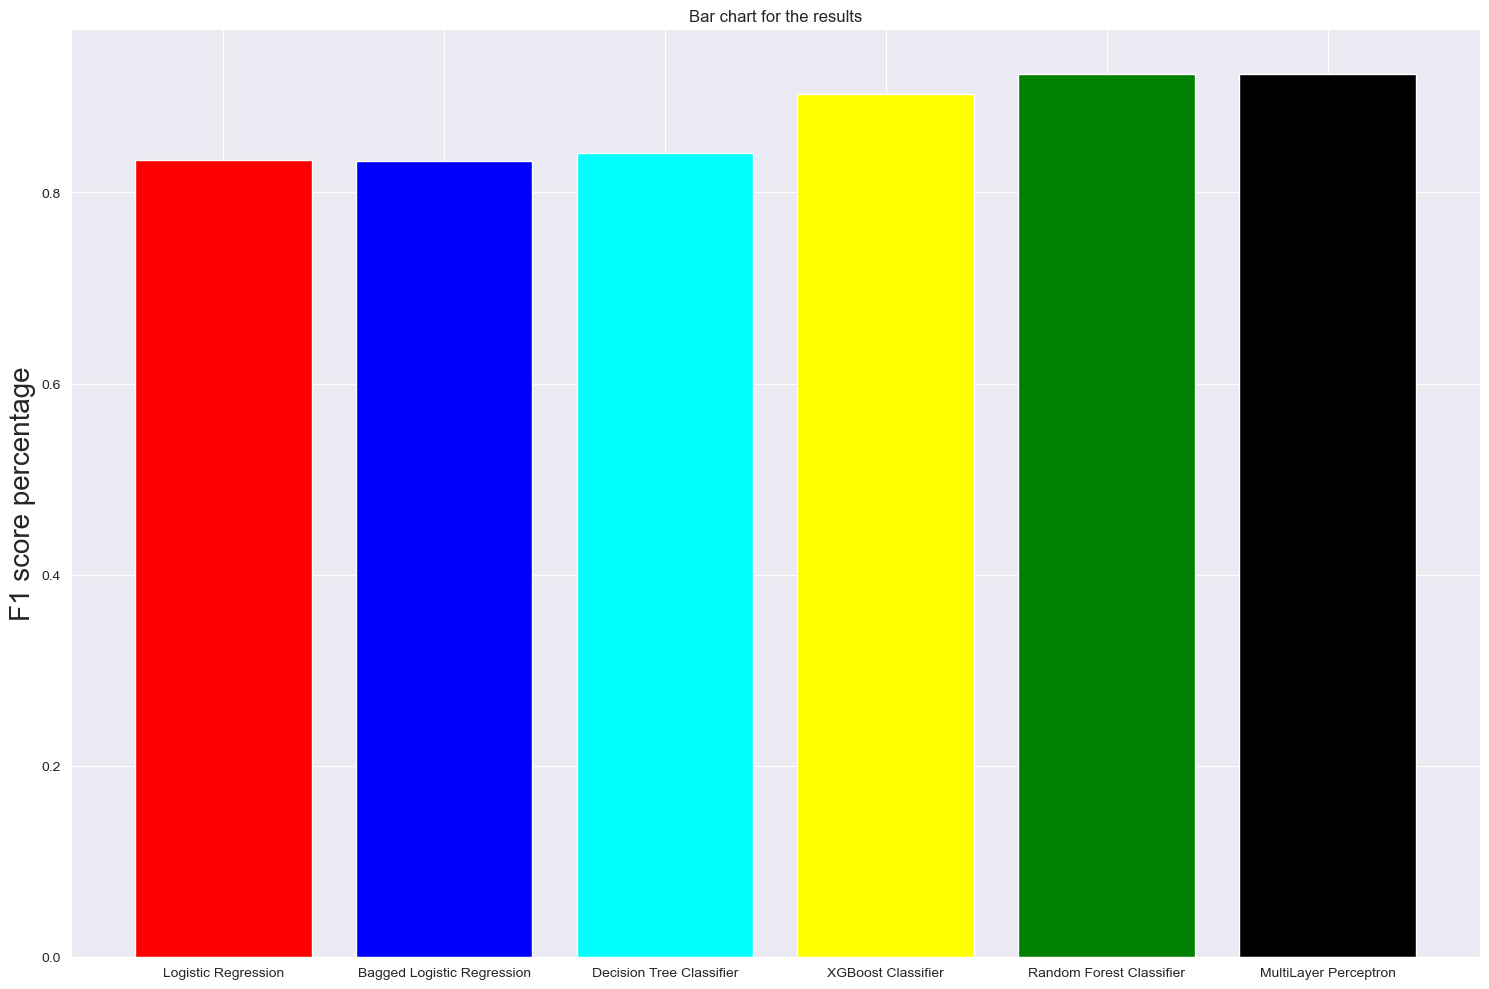

In [61]:
#visualization of results in the bar plot

plt.figure(figsize=(15,10))
plt.bar(result['Algorithms'], result['F1 Score'], color= ['red', 'blue', 'cyan', 'yellow', 'green', 'black'])
plt.title("Bar chart for the results")
plt.ylabel("F1 score percentage", fontsize = 20)
plt.tight_layout()
plt.show()

### **7) CONCLUSION**

###  __TASK : 1__

**ANALYSIS REPORT:**

**DATA HANDLING**
* Imported the data as a CSV file

**DATA VISUALIZATION**
* As the data is customer real time data, so we can't visualize the data, still we visualized the Distribution of the data and we have all the data in mostly **NORMALIZED DISTRIBUTION**

**DATA PREPROCESSING**
* There is no null values and outliers in the data.
* Performed SMOTE to make the unbalanced data as balanced

**FEATURE SELECTION AND REDUCTION**
* Dropped the unwanted columns and Reduced the feature numbers from 200 to 150

**MODEL BUILDING**
* Used 7 different models
  * Logistic Regression
  * Bagged Logistic Regression
  * Decision Tree Classifier
  * Bagged Decision Tree Classifier
  * XGBOOST classifier
  * Randomforest classifier
  * MLP(Multi Layer perceptron)

###  __TASK : 2__

* The project customer transaction prediction is with the unbalanced data and we need to check the F1 SCORE rather than Accuracy Score.
* As per checking with the F1 Score both the Random forest classifier and Multi layer Perceptron performed well with the F1 score 0.92.
* **RANDOM FOREST CLASSIFIER AND MULTI LAYER PERCEPTRON** are the best Suited model for this prediction.